In [160]:
#import appropriate packages

import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
start = time.time()
import numpy
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import StratifiedShuffleSplit

#deep learning
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.callbacks import EarlyStopping
import torch
from torch import nn
from pytorch_tabnet.tab_model import TabNetClassifier

# ETL

# Dataset 1 - COLET

In [161]:
#obtain wd - note all folders/files will need to be in here 

path = os.getcwd()
files = os.listdir()
files

['.ipynb_checkpoints',
 '2023_assignment2_SIT744 (1).ipynb',
 '220477645_SIT744_A2_SOLUTION.ipynb',
 'AHALLAM_220477645_SIT744_assignment1_solution.ipynb',
 'colet_output.csv',
 'colet_output_pre_drop.csv',
 'fixation_finale.txt',
 'gaze_final.csv',
 'SIT723v1.ipynb',
 'SIT724v1.ipynb',
 'SIT724v2.ipynb',
 'SIT724v3.ipynb',
 'SIT744_prac_2_colab.ipynb',
 'SIT744_prac_3_colab.ipynb',
 'SIT744_prac_4_colab.ipynb',
 'SIT744_prac_5_colab.ipynb',
 'SIT744_prac_6 (1).ipynb',
 'Task1_Subject_1.xlsx',
 'Task1_Subject_10.xlsx',
 'Task1_Subject_11.xlsx',
 'Task1_Subject_12.xlsx',
 'Task1_Subject_13.xlsx',
 'Task1_Subject_14.xlsx',
 'Task1_Subject_15.xlsx',
 'Task1_Subject_16.xlsx',
 'Task1_Subject_17.xlsx',
 'Task1_Subject_18.xlsx',
 'Task1_Subject_19.xlsx',
 'Task1_Subject_2.xlsx',
 'Task1_Subject_20.xlsx',
 'Task1_Subject_21.xlsx',
 'Task1_Subject_22.xlsx',
 'Task1_Subject_23.xlsx',
 'Task1_Subject_24.xlsx',
 'Task1_Subject_25.xlsx',
 'Task1_Subject_26.xlsx',
 'Task1_Subject_27.xlsx',
 'Task1_

In [162]:
#extract all excel files 

#IMPORTANT - MAKE SURE THE COLUMN HEADERS IN THE FIRST FILE ARE ALL THERE OTHERWISE THERE WILL BE ISSUES LATER ON!

files_xlsx = [f for f in files if f[-4:] == 'xlsx']
files_xlsx

['Task1_Subject_1.xlsx',
 'Task1_Subject_10.xlsx',
 'Task1_Subject_11.xlsx',
 'Task1_Subject_12.xlsx',
 'Task1_Subject_13.xlsx',
 'Task1_Subject_14.xlsx',
 'Task1_Subject_15.xlsx',
 'Task1_Subject_16.xlsx',
 'Task1_Subject_17.xlsx',
 'Task1_Subject_18.xlsx',
 'Task1_Subject_19.xlsx',
 'Task1_Subject_2.xlsx',
 'Task1_Subject_20.xlsx',
 'Task1_Subject_21.xlsx',
 'Task1_Subject_22.xlsx',
 'Task1_Subject_23.xlsx',
 'Task1_Subject_24.xlsx',
 'Task1_Subject_25.xlsx',
 'Task1_Subject_26.xlsx',
 'Task1_Subject_27.xlsx',
 'Task1_Subject_28.xlsx',
 'Task1_Subject_29.xlsx',
 'Task1_Subject_3.xlsx',
 'Task1_Subject_30.xlsx',
 'Task1_Subject_31.xlsx',
 'Task1_Subject_32.xlsx',
 'Task1_Subject_33.xlsx',
 'Task1_Subject_34.xlsx',
 'Task1_Subject_35.xlsx',
 'Task1_Subject_36.xlsx',
 'Task1_Subject_37.xlsx',
 'Task1_Subject_38.xlsx',
 'Task1_Subject_39.xlsx',
 'Task1_Subject_4.xlsx',
 'Task1_Subject_40.xlsx',
 'Task1_Subject_41.xlsx',
 'Task1_Subject_42.xlsx',
 'Task1_Subject_43.xlsx',
 'Task1_Subject_

In [163]:
#blank dataframe to write to 
#we need one of these for each record type (i.e. 16) otherwise we are appending to differing columns
c_gaze_task1 = pd.DataFrame()
c_gaze_task2 = pd.DataFrame()
c_gaze_task3 = pd.DataFrame()
c_gaze_task4 = pd.DataFrame()
c_pupil_task1 = pd.DataFrame()
c_pupil_task2 = pd.DataFrame()
c_pupil_task3 = pd.DataFrame()
c_pupil_task4 = pd.DataFrame()
c_blinks_task1 = pd.DataFrame()
c_blinks_task2 = pd.DataFrame()
c_blinks_task3 = pd.DataFrame()
c_blinks_task4 = pd.DataFrame()
c_annotation_task1 = pd.DataFrame()
c_annotation_task2 = pd.DataFrame()
c_annotation_task3 = pd.DataFrame()
c_annotation_task4 = pd.DataFrame()

In [164]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_cg1 = []  

for f in files_xlsx:
    data1 = pd.read_excel(f, sheet_name=0)
    data1['file'] = f
    df_cg1.append(data1)

# Concatenate the list of DataFrames into a single DataFrame
c_gaze_task1 = pd.concat(df_cg1)

In [165]:
c_gaze_task1 

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,5410.551715,0,0.999499,0.446264,0.846886,'5410.549631999999-0 5410.553797-1',-6.720630,-31.252881,80.700682,20.004033,...,-0.235298,-0.420213,0.876388,-39.195621,15.099793,-21.600300,0.277597,-0.391313,0.877391,Task1_Subject_1.xlsx
1,5410.555834,0,0.999653,0.446534,0.847007,'5410.557871999999-0 5410.553797-1',-6.690706,-31.298388,80.793260,20.004033,...,-0.234840,-0.420298,0.876470,-39.195621,15.099793,-21.600300,0.277597,-0.391313,0.877391,Task1_Subject_1.xlsx
2,5410.559774,0,0.999648,0.446660,0.846410,'5410.557871999999-0 5410.561675-1',-6.664575,-31.211650,80.708374,20.004033,...,-0.234840,-0.420298,0.876470,-39.195621,15.099793,-21.600300,0.278049,-0.390575,0.877576,Task1_Subject_1.xlsx
3,5410.563583,0,0.999656,0.446442,0.845542,'5410.565490999999-0 5410.561675-1',-6.689463,-31.118351,80.664979,20.004033,...,-0.235225,-0.419217,0.876885,-39.195621,15.099793,-21.600300,0.278049,-0.390575,0.877576,Task1_Subject_1.xlsx
4,5410.568291,0,0.999565,0.446472,0.845614,'5410.565490999999-0 5410.571091999999-1',-6.683464,-31.115105,80.640260,20.004033,...,-0.235225,-0.419217,0.876885,-39.195621,15.099793,-21.600300,0.278153,-0.390681,0.877496,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,228321.640550,203,0.998400,0.475380,0.631670,'228321.642057-0 228321.63904299997-1',-4.361516,-23.527886,139.372822,17.897052,...,-0.130917,-0.241811,0.961451,-37.852364,12.526053,-25.915577,0.193580,-0.186064,0.963279,Task1_Subject_9.xlsx
7278,228321.644953,203,0.999574,0.475981,0.631705,'228321.642057-0 228321.647848-1',-4.185422,-23.313012,138.076497,17.897052,...,-0.130917,-0.241811,0.961451,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx
7279,228321.647579,203,0.998621,0.474966,0.631155,'228321.64731099998-0 228321.647848-1',-4.383473,-23.081466,137.119705,17.897052,...,-0.132854,-0.241547,0.961252,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx
7280,228321.650594,203,0.999000,0.476239,0.634307,'228321.65333899998-0 228321.647848-1',-4.132822,-23.675728,138.214746,17.897052,...,-0.130390,-0.245527,0.960581,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx


In [166]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_cg2 = []  

for f in files_xlsx:
    data2 = pd.read_excel(f, sheet_name = 1)
    data2['file'] = f
    df_cg2.append(data2)

# Concatenate the list of DataFrames into a single DataFrame
c_gaze_task2 = pd.concat(df_cg2)

In [167]:
c_gaze_task2

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,4659.168013,0,0.999946,0.467168,0.841347,'4659.1660919999995-0 4659.169934-1',-3.465714,-28.025541,73.689623,19.490548,...,-0.216004,-0.404146,0.888824,-38.378552,14.746163,-23.063852,0.313394,-0.383356,0.868805,Task1_Subject_1.xlsx
1,4659.171724,0,0.999934,0.467982,0.841412,'4659.173514-0 4659.169934-1',-3.374369,-28.127372,73.947970,19.490548,...,-0.214639,-0.404058,0.889194,-38.378552,14.746163,-23.063852,0.313394,-0.383356,0.868805,Task1_Subject_1.xlsx
2,4659.175874,0,0.999912,0.467992,0.841952,'4659.173514-0 4659.178234999999-1',-3.372870,-28.163546,73.927925,19.490548,...,-0.214639,-0.404058,0.889194,-38.378552,14.746163,-23.063852,0.313423,-0.384043,0.868491,Task1_Subject_1.xlsx
3,4659.179746,0,0.999956,0.467042,0.841566,'4659.181258-0 4659.178234999999-1',-3.479495,-28.023615,73.637258,19.490548,...,-0.216234,-0.403766,0.888941,-38.378552,14.746163,-23.063852,0.313423,-0.384043,0.868491,Task1_Subject_1.xlsx
4,4659.183226,0,0.999976,0.467126,0.841238,'4659.181258-0 4659.185194-1',-3.466174,-27.978763,73.589596,19.490548,...,-0.216234,-0.403766,0.888941,-38.378552,14.746163,-23.063852,0.313692,-0.383646,0.868569,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5400,228504.268961,169,0.556724,0.481309,0.600110,'228504.268961-0',-8.319053,-53.813592,386.637142,199.196377,...,-0.415031,0.068077,0.907257,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
5401,228504.277133,170,0.532541,0.455582,0.613673,'228504.277133-0',-24.112588,-57.702254,379.354003,199.196377,...,-0.446618,0.060300,0.892691,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
5402,228504.279693,170,0.997051,0.457765,0.590002,'228504.284804-0 228504.274583-1',-8.856885,-19.243240,148.062316,20.169042,...,-0.166977,-0.203570,0.964716,-40.120460,14.691800,-20.624819,0.178785,-0.184018,0.966526,Task1_Subject_9.xlsx
5403,228504.282918,170,0.997780,0.452818,0.595424,'228504.284804-0 228504.28103299998-1',-10.838604,-21.549988,159.535551,20.169042,...,-0.166977,-0.203570,0.964716,-40.120460,14.691800,-20.624819,0.157374,-0.184781,0.970098,Task1_Subject_9.xlsx


In [168]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_cg3 = []  

for f in files_xlsx:
    data3 = pd.read_excel(f, sheet_name = 2)
    data3['file'] = f
    df_cg3.append(data3)

# Concatenate the list of DataFrames into a single DataFrame
c_gaze_task3 = pd.concat(df_cg3)   

In [169]:
c_gaze_task3

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,4925.733554,0,0.999807,0.455139,0.829161,'4925.733566-0 4925.733541-1',-5.210845,-28.369822,77.211448,21.275608,...,-0.245195,-0.411069,0.878010,-39.742654,14.772697,-20.876477,0.306528,-0.377348,0.873870,Task1_Subject_1.xlsx
1,4925.737495,0,0.999896,0.455489,0.827894,'4925.733566-0 4925.741424-1',-5.148993,-28.190206,77.013647,21.275608,...,-0.245195,-0.411069,0.878010,-39.742654,14.772697,-20.876477,0.307662,-0.375822,0.874130,Task1_Subject_1.xlsx
2,4925.741473,0,0.999911,0.455146,0.828076,'4925.741521999999-0 4925.741424-1',-5.186693,-28.163240,76.895547,21.275608,...,-0.245780,-0.411400,0.877691,-39.742654,14.772697,-20.876477,0.307662,-0.375822,0.874130,Task1_Subject_1.xlsx
3,4925.745420,0,0.999885,0.454981,0.828821,'4925.741521999999-0 4925.749317999999-1',-5.215824,-28.258688,76.985009,21.275608,...,-0.245780,-0.411400,0.877691,-39.742654,14.772697,-20.876477,0.307127,-0.376733,0.873925,Task1_Subject_1.xlsx
4,4925.749386,0,0.999868,0.454758,0.828875,'4925.749452999999-0 4925.749317999999-1',-5.240436,-28.236476,76.910377,21.275608,...,-0.246163,-0.411530,0.877523,-39.742654,14.772697,-20.876477,0.307127,-0.376733,0.873925,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15190,227926.280984,351,0.999084,0.577568,0.515940,'227926.28500399998-0 227926.27696299998-1',18.936924,-8.713000,140.128402,21.858422,...,-0.018743,-0.162341,0.986557,-34.548309,13.134973,-26.263953,0.303512,-0.122491,0.944921,Task1_Subject_9.xlsx
15191,227926.285003,352,0.998244,0.579733,0.519930,'227926.28500399998-0 227926.285002-1',19.059397,-9.049177,137.359910,21.858422,...,-0.018743,-0.162341,0.986557,-34.548309,13.134973,-26.263953,0.309119,-0.131280,0.941919,Task1_Subject_9.xlsx
15192,227926.289027,352,0.996593,0.581765,0.516821,'227926.28500399998-0 227926.293051-1',19.106148,-8.476573,134.455112,21.858422,...,-0.018743,-0.162341,0.986557,-34.548309,13.134973,-26.263953,0.314391,-0.129470,0.940423,Task1_Subject_9.xlsx
15193,227926.293049,352,0.996438,0.582387,0.518000,'227926.29304699998-0 227926.293051-1',19.340557,-8.665963,135.113591,21.858422,...,-0.017040,-0.163435,0.986407,-34.548309,13.134973,-26.263953,0.314391,-0.129470,0.940423,Task1_Subject_9.xlsx


In [170]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_cg4 = []  

for f in files_xlsx:
    data4 = pd.read_excel(f, sheet_name = 3)
    data4['file'] = f
    df_cg4.append(data4)

# Concatenate the list of DataFrames into a single DataFrame
c_gaze_task4 = pd.concat(df_cg4)      

In [171]:
c_gaze_task4 

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,5186.936018,0,0.999910,0.429778,0.894138,'5186.937763-0 5186.934273-1',-7.849854,-30.436482,68.829957,18.763117,...,-0.255538,-0.444614,0.858498,-37.711558,15.192075,-24.476072,0.276384,-0.423655,0.862629,Task1_Subject_1.xlsx
1,5186.939908,0,0.999884,0.429607,0.893521,'5186.937763-0 5186.942054-1',-7.883667,-30.444688,68.959266,18.763117,...,-0.255538,-0.444614,0.858498,-37.711558,15.192075,-24.476072,0.275779,-0.422871,0.863207,Task1_Subject_1.xlsx
2,5186.944288,0,0.999771,0.429758,0.893629,'5186.946523-0 5186.942054-1',-7.869988,-30.470123,68.998894,18.763117,...,-0.255302,-0.444724,0.858511,-37.711558,15.192075,-24.476072,0.275779,-0.422871,0.863207,Task1_Subject_1.xlsx
3,5186.947952,0,0.999775,0.429542,0.893677,'5186.946523-0 5186.949380999999-1',-7.913816,-30.541058,69.147955,18.763117,...,-0.255302,-0.444724,0.858511,-37.711558,15.192075,-24.476072,0.274999,-0.422905,0.863439,Task1_Subject_1.xlsx
4,5186.951829,0,0.999893,0.430029,0.894655,'5186.954277-0 5186.949380999999-1',-7.868716,-30.663442,69.251569,18.763117,...,-0.254523,-0.445863,0.858152,-37.711558,15.192075,-24.476072,0.274999,-0.422905,0.863439,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16688,222043.332706,272,0.999866,0.515607,0.439272,'222043.33090499998-0 222043.334508-1',3.434937,0.810220,101.123017,19.681803,...,-0.131417,-0.123440,0.983612,-39.328648,14.802702,-21.524028,0.327293,-0.097566,0.939872,Task1_Subject_9.xlsx
16689,222043.336530,273,0.999767,0.514888,0.438728,'222043.33855199997-0 222043.334508-1',3.305292,0.857062,100.751790,19.681803,...,-0.132847,-0.123353,0.983431,-39.328648,14.802702,-21.524028,0.327293,-0.097566,0.939872,Task1_Subject_9.xlsx
16690,222043.340519,273,0.999846,0.514192,0.439384,'222043.33855199997-0 222043.34248599998-1',3.213693,0.802417,101.432418,19.681803,...,-0.132847,-0.123353,0.983431,-39.328648,14.802702,-21.524028,0.325053,-0.097289,0.940678,Task1_Subject_9.xlsx
16691,222043.344584,273,0.999875,0.508943,0.436278,'222043.346681-0 222043.34248599998-1',2.293070,1.059562,98.765386,19.681803,...,-0.143193,-0.123958,0.981901,-39.328648,14.802702,-21.524028,0.325053,-0.097289,0.940678,Task1_Subject_9.xlsx


In [172]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_cpt1 = []  

for f in files_xlsx:
    data5 = pd.read_excel(f, sheet_name = 4)
    data5['file'] = f
    df_cpt1.append(data5)

# Concatenate the list of DataFrames into a single DataFrame
c_pupil_task1 = pd.concat(df_cpt1)      

In [173]:
c_pupil_task1

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,5410.553797,0,1.0,1.000000,0.406205,0.708513,40.757561,'2d c++',77.991356,55.965595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
1,5410.553797,0,1.0,0.999646,0.406235,0.708578,40.764095,'3d c++',77.997212,55.953014,...,-0.714380,1.971798,1.419294,-2.333954,145.942173,79.574077,187.867489,187.867489,90.0,Task1_Subject_1.xlsx
2,5410.557872,0,0.0,0.999661,0.326001,0.395972,38.729047,'3d c++',62.592283,115.973389,...,-0.699703,1.889488,1.768446,-2.346975,134.652012,92.929580,188.411042,188.411042,90.0,Task1_Subject_1.xlsx
3,5410.557872,0,0.0,1.000000,0.325980,0.396084,38.723305,'2d c++',62.588215,115.951805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
4,5410.561675,0,1.0,1.000000,0.406046,0.707954,40.842903,'2d c++',77.960808,56.072765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14563,228321.647848,203,1.0,0.999606,0.426659,0.77834,24.352078,'3d c++',81.918465,42.558716,...,-0.780547,2.011465,1.377815,-2.222073,119.742628,62.863100,119.966404,119.966404,90.0,Task1_Subject_9.xlsx
14564,228321.653339,203,0.0,0.998394,0.255469,0.366622,27.203977,'3d c++',49.049963,121.608670,...,-0.829398,2.073524,1.875600,-2.087452,87.795905,97.738241,127.903724,127.903724,90.0,Task1_Subject_9.xlsx
14565,228321.653339,203,0.0,1.000000,0.255535,0.366481,27.202360,'2d c++',49.062664,121.635742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
14566,228321.653422,203,1.0,1.000000,0.427468,0.778334,24.366371,'2d c++',82.073883,42.559826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx


In [174]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_cpt2 = []  

for f in files_xlsx:
    data6 = pd.read_excel(f, sheet_name = 5)
    data6['file'] = f
    df_cpt2.append(data6)

# Concatenate the list of DataFrames into a single DataFrame
c_pupil_task2 = pd.concat(df_cpt2)    

In [175]:
c_pupil_task2

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,4659.169934,0,1,1.000000,0.383349,0.709518,39.585670,'2d c++',73.602982,55.772636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
1,4659.169934,0,1,0.999989,0.383349,0.709497,39.582783,'3d c++',73.602915,55.776529,...,-0.691045,2.047310,1.432883,-2.369453,141.816092,76.930217,179.758212,179.758212,90.0,Task1_Subject_1.xlsx
2,4659.173514,0,0,1.000000,0.348162,0.349042,37.972534,'2d c++',66.847015,124.983849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,4659.173514,0,0,0.999880,0.348163,0.349008,37.976604,'3d c++',66.847372,124.990553,...,-0.718888,1.948367,1.753716,-2.321682,133.439111,102.086138,179.930302,179.930302,90.0,Task1_Subject_1.xlsx
4,4659.178235,0,1,0.999944,0.383273,0.709904,39.386227,'3d c++',73.588462,55.698340,...,-0.690810,2.037330,1.432163,-2.369687,141.816092,76.930217,179.758212,179.758212,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10805,228504.277133,170,0,0.532541,0.241354,0.372993,29.150211,'3d c++',46.340059,120.385292,...,-0.821699,1.978581,1.833248,-2.124023,91.946413,97.273119,140.664522,140.664522,90.0,Task1_Subject_9.xlsx
10806,228504.281033,170,1,0.997363,0.439062,0.773366,26.222113,'3d c++',84.299861,43.513771,...,-0.802517,1.880712,1.371450,-2.182395,124.057740,66.722506,134.132280,134.132280,90.0,Task1_Subject_9.xlsx
10807,228504.281033,170,1,1.000000,0.439124,0.773477,26.256786,'2d c++',84.311890,43.492386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
10808,228504.284804,170,0,0.990000,0.243847,0.375693,28.903830,'2d c++',46.818550,119.867004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx


In [176]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_cpt3 = []  

for f in files_xlsx:
    data7 = pd.read_excel(f, sheet_name = 6)
    data7['file'] = f
    df_cpt3.append(data7)

# Concatenate the list of DataFrames into a single DataFrame
c_pupil_task3 = pd.concat(df_cpt3)     

In [177]:
c_pupil_task3

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,4925.733541,0,1,0.999716,0.396698,0.717863,39.984980,'3d c++',76.166063,54.170372,...,-0.697941,1.882471,1.438231,-2.360411,148.217415,76.821010,192.722410,192.722410,90.0,Task1_Subject_1.xlsx
1,4925.733541,0,1,1.000000,0.396681,0.717742,39.968163,'2d c++',76.162796,54.193523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
2,4925.733566,0,0,1.000000,0.336370,0.370211,38.975426,'2d c++',64.582977,120.919556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,4925.733566,0,0,0.999898,0.336366,0.370172,38.979005,'3d c++',64.582350,120.927035,...,-0.695439,1.788076,1.757177,-2.355361,140.381627,96.652712,197.635498,197.635498,90.0,Task1_Subject_1.xlsx
4,4925.741424,0,1,0.999894,0.396292,0.716681,40.184041,'3d c++',76.088124,54.397321,...,-0.697569,1.892244,1.439996,-2.361170,148.217415,76.821010,192.722410,192.722410,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30389,227926.293047,352,0,1.000000,0.348153,0.406389,29.538328,'2d c++',66.845345,113.973282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
30390,227926.293051,352,1,0.993435,0.207927,0.697924,25.591635,'3d c++',39.921905,57.998587,...,-0.724845,2.155768,1.490398,-2.327368,89.393333,68.655088,120.008688,120.008688,90.0,Task1_Subject_9.xlsx
30391,227926.293051,352,1,1.000000,0.207900,0.697688,25.531675,'2d c++',39.916801,58.043934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
30392,227926.300983,352,0,1.000000,0.348298,0.406876,29.606018,'2d c++',66.873276,113.879822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx


In [178]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_cpt4 = []  

for f in files_xlsx:
    data8 = pd.read_excel(f, sheet_name = 7)
    data8['file'] = f
    df_cpt4.append(data8)

# Concatenate the list of DataFrames into a single DataFrame
c_pupil_task4 = pd.concat(df_cpt4)     

In [179]:
c_pupil_task4

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,5186.934273,0.0,1.0,0.999998,0.406175,0.712463,41.279886,'3d c++',77.985519,55.207111,...,-0.704411,2.239127,1.384710,-2.342411,140.421651,79.844078,172.482422,172.482422,90.0,Task1_Subject_1.xlsx
1,5186.934273,0.0,1.0,1.000000,0.406178,0.712473,41.281082,'2d c++',77.986107,55.205215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
2,5186.937763,0.0,0.0,1.000000,0.310229,0.395438,39.079651,'2d c++',59.563965,116.075829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,5186.937763,0.0,0.0,0.999822,0.310204,0.395425,39.081583,'3d c++',59.559194,116.078464,...,-0.676369,2.057287,1.792133,-2.375560,129.829297,92.260623,178.962427,178.962427,90.0,Task1_Subject_1.xlsx
4,5186.942054,0.0,1.0,0.999945,0.406465,0.712099,41.363808,'3d c++',78.041339,55.277064,...,-0.705116,2.243082,1.385460,-2.341527,140.421651,79.844078,172.482422,172.482422,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20793,228726.478543,259.0,1.0,0.999965,0.378432,0.739606,24.790353,'3d c++',72.658891,49.995616,...,-0.711201,1.791460,1.425259,-2.339517,123.385082,67.758723,136.440632,136.440632,90.0,Task1_Subject_9.xlsx
20794,228726.489491,259.0,1.0,1.000000,0.379734,0.742002,25.275154,'2d c++',72.908890,49.535595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
20795,228726.489491,259.0,1.0,0.999555,0.379731,0.741950,25.261811,'3d c++',72.908278,49.545545,...,-0.713090,1.824365,1.420014,-2.335953,123.385082,67.758723,136.440632,136.440632,90.0,Task1_Subject_9.xlsx
20796,228726.490165,259.0,0.0,0.998256,0.230248,0.363101,28.222856,'3d c++',44.207595,122.284655,...,-0.892675,1.676591,1.795483,-1.984366,86.552960,98.969429,153.198023,153.198023,90.0,Task1_Subject_9.xlsx


In [180]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_bt1 = []  

for f in files_xlsx:
    data9 = pd.read_excel(f, sheet_name = 8)
    data9['file'] = f
    df_bt1.append(data9)

# Concatenate the list of DataFrames into a single DataFrame
c_blinks_task1 = pd.concat(df_bt1)     

In [181]:
c_blinks_task1 

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,5437.625617,0.236131,5437.861748,37,40,44,0.703872,'0.5068225043614704 0.5512669488059149 0.59571...,'5437.625617 5437.629564 5437.633621 5437.6378...,Task1_Subject_1.xlsx
1,2,5444.161561,0.180073,5444.341634,231,233,236,0.553669,'0.5048782729116744 0.5493227173561188 0.59287...,'5444.161561 5444.165642 5444.169793 5444.1755...,Task1_Subject_1.xlsx
0,1,471465.723115,0.252434,471465.975549,21,24,28,0.659305,'0.53595171449361 0.5822480107899064 0.6061400...,'471465.723115 471465.731078 471465.7310899999...,Task1_Subject_10.xlsx
0,1,8419.904790,0.203903,8420.108693,16,19,22,0.671161,'0.5366363953239319 0.5810808397683763 0.62552...,'8419.90479 8419.908641 8419.912594000001 8419...,Task1_Subject_11.xlsx
1,2,8422.874139,0.166438,8423.040577,105,107,110,0.541905,'0.5358719345469952 0.5803163789914397 0.62476...,'8422.874139000001 8422.877731 8422.8813280000...,Task1_Subject_11.xlsx
...,...,...,...,...,...,...,...,...,...,...,...
3,1,215463.331418,0.183987,215463.515405,114,116,119,0.538360,'0.5203294699020639 0.5685961329456514 0.61091...,'215463.331418 215463.339472 215463.339475 215...,Task1_Subject_7.xlsx
4,1,215470.303547,0.152408,215470.455955,15,17,20,0.525319,'0.5363596149578365 0.546571596185153 0.598641...,'215470.303547 215470.303547 215470.3141669999...,Task1_Subject_7.xlsx
5,2,215471.607640,0.188571,215471.796211,54,57,60,0.581745,'0.5300262745445266 0.576322570840823 0.589166...,'215471.60763999997 215471.611499 215471.61552...,Task1_Subject_7.xlsx
0,1,228310.213116,0.187728,228310.400844,27,30,33,0.604759,'0.545336021138829 0.591632317435125 0.6379286...,'228310.213116 228310.219892 228310.2210439999...,Task1_Subject_9.xlsx


In [182]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_bt2 = []  

for f in files_xlsx:
    data10 = pd.read_excel(f, sheet_name = 9)
    data10['file'] = f
    df_bt2.append(data10)

# Concatenate the list of DataFrames into a single DataFrame
c_blinks_task2 = pd.concat(df_bt2) 

In [183]:
c_blinks_task2

,file,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data
0,Task1_Subject_14.xlsx,1.0,95216.515489,0.175822,95216.691311,154.0,156.0,159.0,0.536885,'0.5154108544114466 0.5598552988558911 0.58607...,'95216.515489 95216.519392 95216.5233 95216.52...
0,Task1_Subject_15.xlsx,1.0,617116.043208,0.175051,617116.218259,6.0,8.0,11.0,0.495686,'0.5000056967831534 0.5444501412275978 0.58889...,'617116.043208 617116.043329 617116.048553 617...
1,Task1_Subject_15.xlsx,2.0,617121.155372,0.199941,617121.355313,159.0,162.0,165.0,0.538263,'0.5166209589605074 0.5270727373215381 0.57151...,'617121.155372 617121.163344 617121.163349 617...
2,Task1_Subject_15.xlsx,1.0,617127.540933,0.186037,617127.726970,134.0,137.0,140.0,0.465043,'0.5128925883496019 0.5573370327940463 0.57356...,'617127.540933 617127.541735 617127.552534 617...
3,Task1_Subject_15.xlsx,1.0,617131.635255,0.197271,617131.832526,56.0,58.0,61.0,0.542619,'0.5123239293892733 0.5196223491222396 0.52619...,'617131.635255 617131.635277 617131.6432619999...
4,Task1_Subject_15.xlsx,2.0,617135.069220,0.166070,617135.235290,158.0,160.0,163.0,0.479600,'0.5225308452401866 0.5669752896846311 0.56898...,'617135.06922 617135.076621 617135.076621 6171...
5,Task1_Subject_15.xlsx,1.0,617138.583431,0.183602,617138.767033,71.0,73.0,76.0,0.521224,'0.5066102033438776 0.507054647788322 0.551499...,'617138.583431 617138.591269 617138.591269 617...
6,Task1_Subject_15.xlsx,2.0,617140.463329,0.188148,617140.651477,127.0,130.0,133.0,0.499640,'0.50030099971071 0.5447454441551542 0.5514020...,'617140.4633289999 617140.471147 617140.471152...
7,Task1_Subject_15.xlsx,1.0,617143.772057,0.235197,617144.007254,86.0,89.0,93.0,0.540647,'0.5091624310178605 0.542546984609271 0.586991...,'617143.772057 617143.772064 617143.780802 617...
0,Task1_Subject_16.xlsx,1.0,686020.432159,0.124183,686020.556342,4.0,6.0,8.0,0.298729,'0.5420785345170478 0.588374830813344 0.584448...,'686020.432159 686020.436547 686020.440508 686...


In [184]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_bt3 = []  

for f in files_xlsx:
    data11 = pd.read_excel(f, sheet_name = 10)
    data11['file'] = f
    df_bt3.append(data11)

# Concatenate the list of DataFrames into a single DataFrame
c_blinks_task3 = pd.concat(df_bt3) 

In [185]:
c_blinks_task3

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,4937.633752,0.219501,4937.853253,355,358,362,0.632858,'0.5145911521303596 0.559035596574804 0.603480...,'4937.633752 4937.637365 4937.642261 4937.6454...,Task1_Subject_1.xlsx
1,2,4938.933606,0.179660,4939.113266,394,396,399,0.594492,'0.5276674487690183 0.5721118932134627 0.61655...,'4938.933606 4938.9373909999995 4938.943244999...,Task1_Subject_1.xlsx
2,3,4942.313627,0.219615,4942.533242,495,498,501,0.643151,'0.5229700933989672 0.5674145378434114 0.61185...,'4942.3136269999995 4942.317322 4942.321507 49...,Task1_Subject_1.xlsx
3,1,4948.394007,0.575348,4948.969355,2,10,19,0.334890,'0.5038569896286232 0.5483014340730676 0.59274...,'4948.394007 4948.397762 4948.4018829999995 49...,Task1_Subject_1.xlsx
4,2,4949.149379,0.175898,4949.325277,25,27,30,0.562926,'0.5131920799712788 0.5576365244157233 0.60208...,'4949.1493789999995 4949.1532959999995 4949.15...,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...
14,2,227905.829044,0.156031,227905.985075,40,42,44,0.503004,'0.5364642300849053 0.5537179306930612 0.56773...,'227905.82904399998 227905.833184 227905.83983...,Task1_Subject_9.xlsx
15,3,227907.771639,0.189371,227907.961010,98,100,103,0.593344,'0.5201340369365625 0.566430333232859 0.612726...,'227907.77163899998 227907.77419599998 227907....,Task1_Subject_9.xlsx
16,1,227917.701956,0.167014,227917.868970,96,98,101,0.536342,'0.5121475304497234 0.5584438267460199 0.60474...,'227917.70195599998 227917.70895899998 227917....,Task1_Subject_9.xlsx
17,2,227919.121020,0.183983,227919.305003,138,141,144,0.598228,'0.5153427691335349 0.5616390654298312 0.58871...,'227919.12102 227919.12117199998 227919.128994...,Task1_Subject_9.xlsx


In [186]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_bt4 = []  

for f in files_xlsx:
    data12 = pd.read_excel(f, sheet_name = 11)
    data12['file'] = f
    df_bt4.append(data12)

# Concatenate the list of DataFrames into a single DataFrame
c_blinks_task4 = pd.concat(df_bt4) 

In [187]:
c_blinks_task4

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,5200.489894,0.628398,5201.118292,122,131,141,0.390568,'0.5071523680042445 0.551596812448689 0.596041...,'5200.489893999999 5200.493501 5200.497832 520...,Task1_Subject_1.xlsx
1,2,5201.585551,0.248134,5201.833685,155,158,162,0.624402,'0.5121954566591707 0.556639901103615 0.601084...,'5201.585551 5201.589585 5201.595933 5201.5976...,Task1_Subject_1.xlsx
0,1,471222.515343,0.239907,471222.755250,94,97,101,0.511628,'0.5026035826318781 0.5494024926669058 0.58377...,'471222.515343 471222.51915 471222.52468 47122...,Task1_Subject_10.xlsx
1,2,471223.659432,0.299866,471223.959298,128,132,137,0.472412,'0.5042939318550955 0.5434117582109237 0.57889...,'471223.659432 471223.667471 471223.6674899999...,Task1_Subject_10.xlsx
2,3,471224.807449,0.167811,471224.975260,163,165,168,0.499396,'0.5350690223532087 0.5840362195594939 0.61723...,'471224.807449 471224.811361 471224.815142 471...,Task1_Subject_10.xlsx
...,...,...,...,...,...,...,...,...,...,...,...
8,3,228712.420777,0.168113,228712.588890,287,289,292,0.554141,'0.5037201405857574 0.5500164368820537 0.59631...,'228712.420777 228712.420938 228712.428812 228...,Task1_Subject_9.xlsx
9,1,228718.560785,0.132246,228718.693031,23,25,27,0.417348,'0.531989059581162 0.5406546851960738 0.548623...,'228718.56078499998 228718.56080099999 228718....,Task1_Subject_9.xlsx
10,2,228719.464743,0.168152,228719.632895,50,52,55,0.534863,'0.5009343921762599 0.5472306884725565 0.57108...,'228719.464743 228719.46478399998 228719.47291...,Task1_Subject_9.xlsx
11,3,228719.940827,0.164094,228720.104921,64,66,69,0.507862,'0.5114266499435292 0.5577229462398255 0.58064...,'228719.94082699998 228719.94083399998 228719....,Task1_Subject_9.xlsx


In [188]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_at1 = []  

for f in files_xlsx:
    data13 = pd.read_excel(f, sheet_name = 12)
    data13['file'] = f
    df_at1.append(data13)

# Concatenate the list of DataFrames into a single DataFrame
c_annotation_task1 = pd.concat(df_at1) 

In [189]:
c_annotation_task1

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx
0,15,5,5,35,5,35,16.7,Task1_Subject_10.xlsx
0,50,10,15,10,50,5,23.3,Task1_Subject_11.xlsx
0,20,10,10,5,20,5,11.7,Task1_Subject_12.xlsx
0,15,15,5,15,15,5,11.7,Task1_Subject_13.xlsx
0,15,15,50,0,15,5,16.7,Task1_Subject_14.xlsx
0,95,100,5,95,95,5,65.8,Task1_Subject_15.xlsx
0,10,5,5,0,10,5,5.8,Task1_Subject_16.xlsx
0,65,85,25,30,60,10,45.8,Task1_Subject_17.xlsx
0,45,10,25,70,40,15,34.2,Task1_Subject_18.xlsx


In [190]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_at2 = []  

for f in files_xlsx:
    data14 = pd.read_excel(f, sheet_name = 13)
    data14['file'] = f
    df_at2.append(data14)

# Concatenate the list of DataFrames into a single DataFrame
c_annotation_task2 = pd.concat(df_at2) 

In [191]:
c_annotation_task2

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,50,30,25,50,15,25,32.5,Task1_Subject_1.xlsx
0,5,5,5,25,5,10,9.2,Task1_Subject_10.xlsx
0,50,25,45,15,35,5,29.2,Task1_Subject_11.xlsx
0,40,25,55,40,45,10,35.8,Task1_Subject_12.xlsx
0,15,15,15,30,30,5,18.3,Task1_Subject_13.xlsx
0,5,5,5,0,10,5,5.0,Task1_Subject_14.xlsx
0,100,5,100,0,90,30,54.2,Task1_Subject_15.xlsx
0,15,5,25,0,15,5,10.8,Task1_Subject_16.xlsx
0,60,10,55,15,40,10,31.7,Task1_Subject_17.xlsx
0,60,10,75,45,35,15,40.0,Task1_Subject_18.xlsx


In [192]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_at3 = []  

for f in files_xlsx:
    data15 = pd.read_excel(f, sheet_name = 14)
    data15['file'] = f
    df_at3.append(data15)

# Concatenate the list of DataFrames into a single DataFrame
c_annotation_task3 = pd.concat(df_at3) 

In [193]:
c_annotation_task3

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,100,10,75,80,90,20,62.5,Task1_Subject_1.xlsx
0,75,5,50,35,70,35,45.0,Task1_Subject_10.xlsx
0,90,15,85,35,85,75,64.2,Task1_Subject_11.xlsx
0,70,10,10,25,60,10,30.8,Task1_Subject_12.xlsx
0,60,35,20,40,60,5,36.7,Task1_Subject_13.xlsx
0,60,25,15,65,50,30,40.8,Task1_Subject_14.xlsx
0,90,5,15,65,70,51,49.3,Task1_Subject_15.xlsx
0,50,5,50,10,55,5,29.2,Task1_Subject_16.xlsx
0,70,10,30,20,75,15,36.7,Task1_Subject_17.xlsx
0,65,10,30,60,60,15,40.0,Task1_Subject_18.xlsx


In [194]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_at4 = []  

for f in files_xlsx:
    data16 = pd.read_excel(f, sheet_name = 15)
    data16['file'] = f
    df_at4.append(data16)

# Concatenate the list of DataFrames into a single DataFrame
c_annotation_task4 = pd.concat(df_at4) 

In [195]:
c_annotation_task4

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,60,15,45,50,20,25,35.8,Task1_Subject_1.xlsx
0,80,5,55,30,70,25,44.2,Task1_Subject_10.xlsx
0,85,10,95,40,90,70,65.0,Task1_Subject_11.xlsx
0,75,20,75,45,70,10,49.2,Task1_Subject_12.xlsx
0,70,25,50,50,65,50,51.7,Task1_Subject_13.xlsx
0,80,10,25,35,50,35,39.2,Task1_Subject_14.xlsx
0,100,5,100,50,100,95,75.0,Task1_Subject_15.xlsx
0,90,5,90,50,90,25,58.3,Task1_Subject_16.xlsx
0,90,10,55,30,60,40,47.5,Task1_Subject_17.xlsx
0,80,10,60,70,70,15,50.8,Task1_Subject_18.xlsx


In [196]:
#check that the naming has worked
print(c_gaze_task1['file'].unique())

['Task1_Subject_1.xlsx' 'Task1_Subject_10.xlsx' 'Task1_Subject_11.xlsx'
 'Task1_Subject_12.xlsx' 'Task1_Subject_13.xlsx' 'Task1_Subject_14.xlsx'
 'Task1_Subject_15.xlsx' 'Task1_Subject_16.xlsx' 'Task1_Subject_17.xlsx'
 'Task1_Subject_18.xlsx' 'Task1_Subject_19.xlsx' 'Task1_Subject_2.xlsx'
 'Task1_Subject_20.xlsx' 'Task1_Subject_21.xlsx' 'Task1_Subject_22.xlsx'
 'Task1_Subject_23.xlsx' 'Task1_Subject_24.xlsx' 'Task1_Subject_25.xlsx'
 'Task1_Subject_26.xlsx' 'Task1_Subject_27.xlsx' 'Task1_Subject_28.xlsx'
 'Task1_Subject_29.xlsx' 'Task1_Subject_3.xlsx' 'Task1_Subject_30.xlsx'
 'Task1_Subject_31.xlsx' 'Task1_Subject_32.xlsx' 'Task1_Subject_33.xlsx'
 'Task1_Subject_34.xlsx' 'Task1_Subject_35.xlsx' 'Task1_Subject_36.xlsx'
 'Task1_Subject_37.xlsx' 'Task1_Subject_38.xlsx' 'Task1_Subject_39.xlsx'
 'Task1_Subject_4.xlsx' 'Task1_Subject_40.xlsx' 'Task1_Subject_41.xlsx'
 'Task1_Subject_42.xlsx' 'Task1_Subject_43.xlsx' 'Task1_Subject_44.xlsx'
 'Task1_Subject_5.xlsx' 'Task1_Subject_6.xlsx' 'Task1_S

In [197]:
c_annotation_task1

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx
0,15,5,5,35,5,35,16.7,Task1_Subject_10.xlsx
0,50,10,15,10,50,5,23.3,Task1_Subject_11.xlsx
0,20,10,10,5,20,5,11.7,Task1_Subject_12.xlsx
0,15,15,5,15,15,5,11.7,Task1_Subject_13.xlsx
0,15,15,50,0,15,5,16.7,Task1_Subject_14.xlsx
0,95,100,5,95,95,5,65.8,Task1_Subject_15.xlsx
0,10,5,5,0,10,5,5.8,Task1_Subject_16.xlsx
0,65,85,25,30,60,10,45.8,Task1_Subject_17.xlsx
0,45,10,25,70,40,15,34.2,Task1_Subject_18.xlsx


In [198]:
#adding a task column to each one before joining together

#code seems to be updating the original dataframe, am saving these instead
c_gaze_task1_dl = c_gaze_task1
c_gaze_task2_dl = c_gaze_task2
c_gaze_task3_dl = c_gaze_task3
c_gaze_task4_dl = c_gaze_task4
c_pupil_task1_dl = c_pupil_task1
c_pupil_task2_dl = c_pupil_task2
c_pupil_task3_dl = c_pupil_task3
c_pupil_task4_dl = c_pupil_task4
c_blinks_task1_dl = c_blinks_task1
c_blinks_task2_dl = c_blinks_task2
c_blinks_task3_dl = c_blinks_task3
c_blinks_task4_dl = c_blinks_task4
c_annotation_task1_dl = c_annotation_task1
c_annotation_task2_dl = c_annotation_task2
c_annotation_task3_dl = c_annotation_task3
c_annotation_task4_dl = c_annotation_task4

#adding a task to each
c_gaze_task1_dl['task'] = '1'
c_gaze_task2_dl['task'] = '2'
c_gaze_task3_dl['task'] = '3'
c_gaze_task4_dl['task'] = '4'
c_pupil_task1_dl['task'] = '1'
c_pupil_task2_dl['task'] = '2'
c_pupil_task3_dl['task'] = '3'
c_pupil_task4_dl['task'] = '4'
c_blinks_task1_dl['task'] = '1'
c_blinks_task2_dl['task'] = '2'
c_blinks_task3_dl['task'] = '3'
c_blinks_task4_dl['task'] = '4'
c_annotation_task1_dl['task'] = '1'
c_annotation_task2_dl['task'] = '2'
c_annotation_task3_dl['task'] = '3'
c_annotation_task4_dl['task'] = '4'

In [199]:
c_gaze_task1_dl

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file,task
0,5410.551715,0,0.999499,0.446264,0.846886,'5410.549631999999-0 5410.553797-1',-6.720630,-31.252881,80.700682,20.004033,...,-0.420213,0.876388,-39.195621,15.099793,-21.600300,0.277597,-0.391313,0.877391,Task1_Subject_1.xlsx,1
1,5410.555834,0,0.999653,0.446534,0.847007,'5410.557871999999-0 5410.553797-1',-6.690706,-31.298388,80.793260,20.004033,...,-0.420298,0.876470,-39.195621,15.099793,-21.600300,0.277597,-0.391313,0.877391,Task1_Subject_1.xlsx,1
2,5410.559774,0,0.999648,0.446660,0.846410,'5410.557871999999-0 5410.561675-1',-6.664575,-31.211650,80.708374,20.004033,...,-0.420298,0.876470,-39.195621,15.099793,-21.600300,0.278049,-0.390575,0.877576,Task1_Subject_1.xlsx,1
3,5410.563583,0,0.999656,0.446442,0.845542,'5410.565490999999-0 5410.561675-1',-6.689463,-31.118351,80.664979,20.004033,...,-0.419217,0.876885,-39.195621,15.099793,-21.600300,0.278049,-0.390575,0.877576,Task1_Subject_1.xlsx,1
4,5410.568291,0,0.999565,0.446472,0.845614,'5410.565490999999-0 5410.571091999999-1',-6.683464,-31.115105,80.640260,20.004033,...,-0.419217,0.876885,-39.195621,15.099793,-21.600300,0.278153,-0.390681,0.877496,Task1_Subject_1.xlsx,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,228321.640550,203,0.998400,0.475380,0.631670,'228321.642057-0 228321.63904299997-1',-4.361516,-23.527886,139.372822,17.897052,...,-0.241811,0.961451,-37.852364,12.526053,-25.915577,0.193580,-0.186064,0.963279,Task1_Subject_9.xlsx,1
7278,228321.644953,203,0.999574,0.475981,0.631705,'228321.642057-0 228321.647848-1',-4.185422,-23.313012,138.076497,17.897052,...,-0.241811,0.961451,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx,1
7279,228321.647579,203,0.998621,0.474966,0.631155,'228321.64731099998-0 228321.647848-1',-4.383473,-23.081466,137.119705,17.897052,...,-0.241547,0.961252,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx,1
7280,228321.650594,203,0.999000,0.476239,0.634307,'228321.65333899998-0 228321.647848-1',-4.132822,-23.675728,138.214746,17.897052,...,-0.245527,0.960581,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx,1


In [200]:
#other option for joinnig the data 
#concatenate all of the annotations together
annot_concat = pd.concat([c_annotation_task1_dl, c_annotation_task2_dl, c_annotation_task3_dl, c_annotation_task4_dl], ignore_index=True)
gaze_concat = pd.concat([c_gaze_task1_dl, c_gaze_task2_dl, c_gaze_task3_dl, c_gaze_task4_dl], ignore_index=True)
pupil_concat = pd.concat([c_pupil_task1_dl, c_pupil_task2_dl, c_pupil_task3_dl, c_pupil_task4_dl], ignore_index=True)
blink_concat = pd.concat([c_blinks_task1_dl, c_blinks_task2_dl, c_blinks_task3_dl, c_blinks_task4_dl], ignore_index=True)

#stratifying by participants - the dataframe below is way too big to handle, so having to trim it a bit 

#set stratified random sampling, note we are maintaining 30%
srs = StratifiedShuffleSplit(n_splits=1, test_size = 0.9, random_state = 69)

#gaze
_, indices = next(srs.split(gaze_concat, gaze_concat['file']))
gaze_concat = gaze_concat.iloc[indices[:int(0.1 * len(indices))]]

#pupil
_, indices = next(srs.split(pupil_concat, pupil_concat['file']))
pupil_concat = pupil_concat.iloc[indices[:int(0.1 * len(indices))]]

#blink
_, indices = next(srs.split(blink_concat, blink_concat['file']))
blink_concat = blink_concat.iloc[indices[:int(0.1 * len(indices))]]

In [201]:
blink_concat['duration'] = blink_concat['duration'].astype('float16')
blink_concat['confidence'] = blink_concat['confidence'].astype('float16')
blink_concat['start_timestamp'] = blink_concat['start_timestamp'].astype('float16')
blink_concat['end_timestamp'] = blink_concat['end_timestamp'].astype('float16')

print(blink_concat.dtypes)



ID                    object
start_timestamp      float16
duration             float16
end_timestamp        float16
start_frame_index     object
index                 object
end_frame_index       object
confidence           float16
filter_response       object
base_Data             object
file                  object
task                  object
dtype: object


In [202]:
gaze_concat['gaze_timestamp'] = gaze_concat['gaze_timestamp'].astype('float16')
gaze_concat['confidence'] = gaze_concat['confidence'].astype('float16')
gaze_concat['norm_pos_x'] = gaze_concat['norm_pos_x'].astype('float16')
gaze_concat['norm_pos_y'] = gaze_concat['norm_pos_y'].astype('float16')
gaze_concat['gaze_point_3d_x'] = gaze_concat['gaze_point_3d_x'].astype('float16')
gaze_concat['gaze_point_3d_y'] = gaze_concat['gaze_point_3d_y'].astype('float16')
gaze_concat['gaze_point_3d_z'] = gaze_concat['gaze_point_3d_z'].astype('float32')
gaze_concat['eye_center0_3d_x'] = gaze_concat['eye_center0_3d_x'].astype('float16')
gaze_concat['eye_center0_3d_y'] = gaze_concat['eye_center0_3d_y'].astype('float16')
gaze_concat['eye_center0_3d_z'] = gaze_concat['eye_center0_3d_z'].astype('float16')
gaze_concat['gaze_normal0_x'] = gaze_concat['gaze_normal0_x'].astype('float16')
gaze_concat['gaze_normal0_y'] = gaze_concat['gaze_normal0_y'].astype('float16')
gaze_concat['gaze_normal0_z'] = gaze_concat['gaze_normal0_z'].astype('float16')

print(gaze_concat.dtypes)

gaze_timestamp      float16
world_index           int64
confidence          float16
norm_pos_x          float16
norm_pos_y          float16
base_data            object
gaze_point_3d_x     float16
gaze_point_3d_y     float16
gaze_point_3d_z     float32
eye_center0_3d_x    float16
eye_center0_3d_y    float16
eye_center0_3d_z    float16
gaze_normal0_x      float16
gaze_normal0_y      float16
gaze_normal0_z      float16
eye_center1_3d_x    float64
eye_center1_3d_y    float64
eye_center1_3d_z    float64
gaze_normal1_x      float64
gaze_normal1_y      float64
gaze_normal1_z      float64
file                 object
task                 object
dtype: object


In [203]:
pupil_concat['pupil_timestamp'] = pupil_concat['pupil_timestamp'].astype('float16')
pupil_concat['confidence'] = pupil_concat['confidence'].astype('float16')
pupil_concat['norm_pos_x'] = pupil_concat['norm_pos_x'].astype('float16')
pupil_concat['diameter'] = pupil_concat['diameter'].astype('float16')
pupil_concat['ellipse_center_x'] = pupil_concat['ellipse_center_x'].astype('float16')
pupil_concat['ellipse_center_y'] = pupil_concat['ellipse_center_y'].astype('float16')
pupil_concat['ellipse_axis_a'] = pupil_concat['ellipse_axis_a'].astype('float16')
pupil_concat['ellipse_axis_b'] = pupil_concat['ellipse_axis_b'].astype('float16')
pupil_concat['ellipse_angle'] = pupil_concat['ellipse_angle'].astype('float16')
pupil_concat['diameter_3d'] = pupil_concat['diameter_3d'].astype('float16')
pupil_concat['model_confidence'] = pupil_concat['model_confidence'].astype('float16')
pupil_concat['model_id'] = pupil_concat['model_id'].astype('float16')
pupil_concat['sphere_center_x'] = pupil_concat['sphere_center_x'].astype('float16')
pupil_concat['sphere_center_y'] = pupil_concat['sphere_center_y'].astype('float16')
pupil_concat['sphere_center_z'] = pupil_concat['sphere_center_z'].astype('float16')
pupil_concat['sphere_radius'] = pupil_concat['sphere_radius'].astype('float16')
pupil_concat['circle_3d_center_x'] = pupil_concat['circle_3d_center_x'].astype('float16')
pupil_concat['circle_3d_center_y'] = pupil_concat['circle_3d_center_y'].astype('float16')
pupil_concat['circle_3d_center_z'] = pupil_concat['circle_3d_center_z'].astype('float16')
pupil_concat['circle_3d_normal_x'] = pupil_concat['circle_3d_normal_x'].astype('float16')
pupil_concat['circle_3d_center_y'] = pupil_concat['circle_3d_center_y'].astype('float16')
pupil_concat['circle_3d_normal_z'] = pupil_concat['circle_3d_normal_z'].astype('float16')
pupil_concat['circle_3d_radius'] = pupil_concat['circle_3d_radius'].astype('float16')
pupil_concat['theta'] = pupil_concat['theta'].astype('float16')
pupil_concat['phi'] = pupil_concat['phi'].astype('float16')
pupil_concat['projected_sphere_center_x'] = pupil_concat['projected_sphere_center_x'].astype('float16')
pupil_concat['projected_sphere_center_y'] = pupil_concat['projected_sphere_center_y'].astype('float16')
pupil_concat['projected_sphere_axis_a'] = pupil_concat['projected_sphere_axis_a'].astype('float16')

print(pupil_concat.dtypes)

pupil_timestamp              float16
world_index                   object
eye_id                        object
confidence                   float16
norm_pos_x                   float16
norm_pos_y                    object
diameter                     float16
method                        object
ellipse_center_x             float16
ellipse_center_y             float16
ellipse_axis_a               float16
ellipse_axis_b               float16
ellipse_angle                float16
diameter_3d                  float16
model_confidence             float16
model_id                     float16
sphere_center_x              float16
sphere_center_y              float16
sphere_center_z              float16
sphere_radius                float16
circle_3d_center_x           float16
circle_3d_center_y           float16
circle_3d_center_z           float16
circle_3d_normal_x           float16
circle_3d_normal_y           float64
circle_3d_normal_z           float16
circle_3d_radius             float16
t

In [204]:
#list dataframes to be merged
#dataframes = [annot_concat, gaze_concat, pupil_concat, blink_concat]

#create a loop to merge the dataframes with the key of 'file'
#deep_data = dataframes[0]
#for df in dataframes[1:]:
#    deep_data = pd.merge(deep_data, df, on=['file', 'task'], how='outer')
    
#deep_data = pd.merge(deep_data, annot_concat, on=['file', 'task'], how = 'left')

In [205]:
import pandas as pd

# List of dataframes to be merged
dataframes = [annot_concat, gaze_concat, pupil_concat, blink_concat]

# Split the dataframes into smaller subsets
chunk_size = 2  # Number of dataframes to merge in each iteration
chunks = [dataframes[i:i + chunk_size] for i in range(0, len(dataframes), chunk_size)]

# Merge the dataframes iteratively
merged_chunks = []
for chunk in chunks:
    merged_chunk = chunk[0]
    for df in chunk[1:]:
        merged_chunk = pd.merge(merged_chunk, df, on=['file', 'task'], how='outer', suffixes=('_left', '_right'))
    merged_chunks.append(merged_chunk)

# Concatenate the merged chunks
deep_data = pd.concat(merged_chunks)

# Merge with annot_concat separately
deep_data = pd.merge(deep_data, annot_concat, on=['file', 'task'], how='left', suffixes=('_merged', '_annot'))

In [206]:
#for some reason it errors unless I let it join annotation twice, so dropping the additional columns

deep_data = deep_data[[col for col in deep_data.columns if not col.endswith('_annot')]]

deep_data

,mental_1_merged,physical_1_merged,temporal_1_merged,perforamnce_1_merged,effort_1_merged,frustation_1_merged,mean_1_merged,file,task,gaze_timestamp,...,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence_right,filter_response,base_Data
0,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx,1,5428.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx,1,5416.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx,1,5412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx,1,5440.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx,1,5444.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_17.xlsx,3,NaN,...,3,inf,0.260254,inf,179,182,186,0.649902,'0.5092592592592592 0.521016926431735 0.567313...,'693380.7622689999 693380.762273 693380.770334...
1023325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_17.xlsx,3,NaN,...,3,inf,0.260254,inf,179,182,186,0.649902,'0.5092592592592592 0.521016926431735 0.567313...,'693380.7622689999 693380.762273 693380.770334...
1023326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_17.xlsx,3,NaN,...,3,inf,0.260254,inf,179,182,186,0.649902,'0.5092592592592592 0.521016926431735 0.567313...,'693380.7622689999 693380.762273 693380.770334...
1023327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_17.xlsx,3,NaN,...,3,inf,0.260254,inf,179,182,186,0.649902,'0.5092592592592592 0.521016926431735 0.567313...,'693380.7622689999 693380.762273 693380.770334...


In [207]:
#add a level of cognitive load for each task
deep_data_multiclass = deep_data

bins = [0, 29, 49, 100]
labels = ['1', '2', '3']
deep_data_multiclass['mean_1_merged'] = pd.cut(deep_data_multiclass['mean_1_merged'], bins, labels=labels)
print(deep_data_multiclass)

        mental_1_merged physical_1_merged temporal_1_merged  \
0                    10                 5                15   
1                    10                 5                15   
2                    10                 5                15   
3                    10                 5                15   
4                    10                 5                15   
...                 ...               ...               ...   
1023324             NaN               NaN               NaN   
1023325             NaN               NaN               NaN   
1023326             NaN               NaN               NaN   
1023327             NaN               NaN               NaN   
1023328             NaN               NaN               NaN   

        perforamnce_1_merged effort_1_merged frustation_1_merged  \
0                         25              25                  10   
1                         25              25                  10   
2                         25           

In [208]:
#add a level of cognitive load for each task
import pandas as pd

# Make a copy of deep_data
deep_data_binary = deep_data.copy()

# Convert 'mean_1_merged' column to numeric type
deep_data_binary['mean_1_merged'] = pd.to_numeric(deep_data_binary['mean_1_merged'], errors='coerce')

# Define bins and labels for binning
bins = [0, 29, 49, 100]
labels = ['1', '2', '3']

# Apply binning and replace '3' with '1'
deep_data_binary['mean_1_merged'] = pd.cut(deep_data_binary['mean_1_merged'], bins, labels=labels)
deep_data_binary['mean_1_merged'] = deep_data_binary['mean_1_merged'].replace('3', '1')

In [209]:
#saving a copy to get the length of blinks

c_blinks_task1_l = c_blinks_task1
c_blinks_task2_l = c_blinks_task2
c_blinks_task3_l = c_blinks_task3
c_blinks_task4_l = c_blinks_task4

In [210]:
#stop here - believe the iloc is correct, but the table is saving differently for blink_task_2 so need to make sure it's select the right data
#c_blinks_task2_l
#c_blinks_task2

In [211]:
#only interested in specific columns, so we will drop everything except those
#note that the 'file' column is the 'participant'

#Gaze data
c_gaze_task1 = c_gaze_task1.iloc[:, [0,6,7,8,21]]
c_gaze_task2 = c_gaze_task2.iloc[:, [0,6,7,8,21]]
c_gaze_task3 = c_gaze_task3.iloc[:, [0,6,7,8,21]]
c_gaze_task4 = c_gaze_task4.iloc[:, [0,6,7,8,21]]

#Pupil data max
c_pupil_task1_m = c_pupil_task1.iloc[:, [6,34]]
c_pupil_task2_m = c_pupil_task2.iloc[:, [6,34]]
c_pupil_task3_m = c_pupil_task3.iloc[:, [6,34]]
c_pupil_task4_m = c_pupil_task4.iloc[:, [6,34]]

#Pupil data
c_pupil_task1 = c_pupil_task1.iloc[:, [6,34]]
c_pupil_task2 = c_pupil_task2.iloc[:, [6,34]]
c_pupil_task3 = c_pupil_task3.iloc[:, [6,34]]
c_pupil_task4 = c_pupil_task4.iloc[:, [6,34]]

#Blink data length 
c_blinks_task1_l = c_blinks_task1.iloc[:, [1,3,10]]
c_blinks_task2_l = c_blinks_task2.iloc[:, [0,2,4]] #updating to select appropriate columns
c_blinks_task3_l = c_blinks_task3.iloc[:, [1,3,10]]
c_blinks_task4_l = c_blinks_task4.iloc[:, [1,3,10]]

#Blink data length max
#adding in the below to test 14/11/2023
c_blinks_task1_m = c_blinks_task1.iloc[:, [1,3,10]]
c_blinks_task2_m = c_blinks_task2.iloc[:, [0,2,4]] #updating to select appropriate columns
c_blinks_task3_m= c_blinks_task3.iloc[:, [1,3,10]]
c_blinks_task4_m= c_blinks_task4.iloc[:, [1,3,10]]

#Blink data - indx and file
c_blinks_task1 = c_blinks_task1.iloc[:, [5,10]]
c_blinks_task2 = c_blinks_task2.iloc[:, [0,6]] #updating to select appropriate columns
c_blinks_task3 = c_blinks_task3.iloc[:, [5,10]]
c_blinks_task4 = c_blinks_task4.iloc[:, [5,10]]

#annotation data - mean and file
c_annotation_task1 = c_annotation_task1.iloc[:, [6,7]]
c_annotation_task2 = c_annotation_task2.iloc[:, [6,7]]
c_annotation_task3 = c_annotation_task3.iloc[:, [6,7]]
c_annotation_task4 = c_annotation_task4.iloc[:, [6,7]]

In [212]:
#get the difference between the previous value for each row

#Task 1
c_gaze_task1.sort_values(['file'], inplace=True)
c_gaze_task1['gaze_diff'] = c_gaze_task1.groupby('file')['gaze_timestamp'].diff()
c_gaze_task1['x_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task1['y_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task1['z_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task1['z_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_z'].diff()

#Task 2
c_gaze_task2.sort_values(['file'], inplace=True)
c_gaze_task2['gaze_diff'] = c_gaze_task2.groupby('file')['gaze_timestamp'].diff()
c_gaze_task2['x_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task2['y_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task2['z_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task2['z_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_z'].diff()

#Task 3
c_gaze_task3.sort_values(['file'], inplace=True)
c_gaze_task3['gaze_diff'] = c_gaze_task3.groupby('file')['gaze_timestamp'].diff()
c_gaze_task3['x_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task3['y_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task3['z_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task3['z_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_z'].diff()

#Task 4
c_gaze_task4.sort_values(['file'], inplace=True)
c_gaze_task4['gaze_diff'] = c_gaze_task4.groupby('file')['gaze_timestamp'].diff()
c_gaze_task4['x_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task4['y_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task4['z_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task4['z_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_z'].diff()

In [213]:
#square x, y and z

#Task 1
c_gaze_task1['x_diff^2'] = c_gaze_task1['x_diff']**2
c_gaze_task1['y_diff^2'] = c_gaze_task1['y_diff']**2
c_gaze_task1['z_diff^2'] = c_gaze_task1['z_diff']**2

#Task 2
c_gaze_task2['x_diff^2'] = c_gaze_task2['x_diff']**2
c_gaze_task2['y_diff^2'] = c_gaze_task2['y_diff']**2
c_gaze_task2['z_diff^2'] = c_gaze_task2['z_diff']**2

#Task 3
c_gaze_task3['x_diff^2'] = c_gaze_task3['x_diff']**2
c_gaze_task3['y_diff^2'] = c_gaze_task3['y_diff']**2
c_gaze_task3['z_diff^2'] = c_gaze_task3['z_diff']**2

#Task 4
c_gaze_task4['x_diff^2'] = c_gaze_task4['x_diff']**2
c_gaze_task4['y_diff^2'] = c_gaze_task4['y_diff']**2
c_gaze_task4['z_diff^2'] = c_gaze_task4['z_diff']**2

In [214]:
#sum x, y and z

column_names = ['x_diff^2','y_diff^2','z_diff^2']

#task 1
c_gaze_task1['sum']= c_gaze_task1[column_names].sum(axis=1)

#task 2
c_gaze_task2['sum']= c_gaze_task2[column_names].sum(axis=1)

#task 3
c_gaze_task3['sum']= c_gaze_task3[column_names].sum(axis=1)

#task 4
c_gaze_task4['sum']= c_gaze_task4[column_names].sum(axis=1)

In [215]:
#take sqrt of this value

#task 1
c_gaze_task1['sqrt']= np.sqrt(c_gaze_task1['sum'])

#task 2
c_gaze_task2['sqrt']= np.sqrt(c_gaze_task2['sum'])

#task 1
c_gaze_task3['sqrt']= np.sqrt(c_gaze_task3['sum'])

#task 1
c_gaze_task4['sqrt']= np.sqrt(c_gaze_task4['sum'])

In [216]:
#multiply by displacement to obtain velocity

#task 1
c_gaze_task1['velocity'] = c_gaze_task1['gaze_diff'] / c_gaze_task1['sqrt']

#task 2
c_gaze_task2['velocity'] = c_gaze_task2['gaze_diff'] / c_gaze_task2['sqrt']

#task 3
c_gaze_task3['velocity'] = c_gaze_task3['gaze_diff'] / c_gaze_task3['sqrt']

#task 4
c_gaze_task4['velocity'] = c_gaze_task4['gaze_diff'] / c_gaze_task4['sqrt']

In [217]:
#fixation flag

#task 1
c_gaze_task1['fixation_flag'] = np.where((c_gaze_task1['velocity'] < 0.45) & (c_gaze_task1['gaze_diff']) > 0.55, 1, 0)

#task 2
c_gaze_task2['fixation_flag'] = np.where((c_gaze_task2['velocity'] < 0.45) & (c_gaze_task2['gaze_diff']) > 0.55, 1, 0)

#task 3
c_gaze_task3['fixation_flag'] = np.where((c_gaze_task3['velocity'] < 0.45) & (c_gaze_task3['gaze_diff']) > 0.55, 1, 0)

#task 4
c_gaze_task4['fixation_flag'] = np.where((c_gaze_task4['velocity'] < 0.45) & (c_gaze_task4['gaze_diff']) > 0.55, 1, 0)

In [218]:
#change into groups

#task 1
c_gaze_task1['fix_group'] = c_gaze_task1.fixation_flag.diff().abs().cumsum().fillna(0).astype(int) + 1 

#task 2
c_gaze_task2['fix_group'] = c_gaze_task2.fixation_flag.diff().abs().cumsum().fillna(0).astype(int) + 1 

#task 3
c_gaze_task3['fix_group'] = c_gaze_task3.fixation_flag.diff().abs().cumsum().fillna(0).astype(int) + 1 

#task 4
c_gaze_task4['fix_group'] = c_gaze_task4.fixation_flag.diff().abs().cumsum().fillna(0).astype(int) + 1 

In [219]:
#creating our final flag - where there is a fixation group and there is a fixation

#task 1
c_gaze_task1['fixation_group_flag'] = np.where((c_gaze_task1['fixation_flag'] > 0) & (c_gaze_task1['fix_group'] > 0), 1, 0)

#task 1
c_gaze_task2['fixation_group_flag'] = np.where((c_gaze_task2['fixation_flag'] > 0) & (c_gaze_task2['fix_group'] > 0), 1, 0)

#task 1
c_gaze_task3['fixation_group_flag'] = np.where((c_gaze_task3['fixation_flag'] > 0) & (c_gaze_task3['fix_group'] > 0), 1, 0)

#task 1
c_gaze_task4['fixation_group_flag'] = np.where((c_gaze_task4['fixation_flag'] > 0) & (c_gaze_task4['fix_group'] > 0), 1, 0)

In [220]:
#creating our final flag - fiation non group flag - i.e. is a fixation but not part of a group 

#task 1
c_gaze_task1['fix_non_group_flag'] = np.where((c_gaze_task1['fixation_flag'] > 0) & (c_gaze_task1['fix_group'] < 1), 1, 0)

#task 1
c_gaze_task2['fix_non_group_flag'] = np.where((c_gaze_task2['fixation_flag'] > 0) & (c_gaze_task2['fix_group'] < 1), 1, 0)

#task 1
c_gaze_task3['fix_non_group_flag'] = np.where((c_gaze_task3['fixation_flag'] > 0) & (c_gaze_task3['fix_group'] < 1), 1, 0)

#task 1
c_gaze_task4['fix_non_group_flag'] = np.where((c_gaze_task4['fixation_flag'] > 0) & (c_gaze_task4['fix_group'] < 1), 1, 0)

In [221]:
c_gaze_task1

,gaze_timestamp,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,file,gaze_diff,x_diff,y_diff,z_diff,x_diff^2,y_diff^2,z_diff^2,sum,sqrt,velocity,fixation_flag,fix_group,fixation_group_flag,fix_non_group_flag
0,5410.551715,-6.720630,-31.252881,80.700682,Task1_Subject_1.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0,1,0,0
5478,5433.179587,-4.462077,-18.010615,86.591717,Task1_Subject_1.xlsx,22.627873,2.258554,13.242266,5.891035,5.101064,175.357615,3.470429e+01,215.162973,14.668435,1.542624,0,1,0,0
5477,5433.175585,-4.455963,-18.064852,86.591530,Task1_Subject_1.xlsx,-0.004002,0.006114,-0.054237,-0.000187,0.000037,0.002942,3.497421e-08,0.002979,0.054581,-0.073332,1,2,1,0
5476,5433.171898,-4.531360,-18.156100,86.931601,Task1_Subject_1.xlsx,-0.003687,-0.075398,-0.091248,0.340071,0.005685,0.008326,1.156485e-01,0.129659,0.360083,-0.010238,1,2,1,0
5475,5433.167889,-4.653441,-18.025426,86.550644,Task1_Subject_1.xlsx,-0.004009,-0.122080,0.130674,-0.380957,0.014904,0.017076,1.451284e-01,0.177108,0.420842,-0.009526,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,228301.340642,18.679975,-9.777446,124.880070,Task1_Subject_9.xlsx,-0.003878,0.001531,0.043974,0.806033,0.000002,0.001934,6.496896e-01,0.651626,0.807233,-0.004804,1,5824,1,0
2419,228301.336670,19.419896,-10.039400,126.826686,Task1_Subject_9.xlsx,-0.003972,0.739921,-0.261954,1.946616,0.547484,0.068620,3.789313e+00,4.405416,2.098908,-0.001892,1,5824,1,0
2418,228301.332579,19.430780,-10.329045,127.807880,Task1_Subject_9.xlsx,-0.004092,0.010884,-0.289645,0.981194,0.000118,0.083894,9.627408e-01,1.046754,1.023110,-0.004000,1,5824,1,0
2444,228301.435055,19.148569,-9.804192,124.773100,Task1_Subject_9.xlsx,0.102477,-0.282211,0.524853,-3.034779,0.079643,0.275471,9.209886e+00,9.564999,3.092733,0.033135,1,5824,1,0


In [222]:
#doing counts seems to actually update the dataframe - making copies to avoid this issue

c_gaze_task1sac = c_gaze_task1
c_gaze_task1_fixgr = c_gaze_task1
c_gaze_task1_fix_nongr =  c_gaze_task1

c_gaze_task2sac = c_gaze_task2
c_gaze_task2_fixgr = c_gaze_task2
c_gaze_task2_fix_nongr =  c_gaze_task2

c_gaze_task3sac = c_gaze_task3
c_gaze_task3_fixgr = c_gaze_task3
c_gaze_task3_fix_nongr =  c_gaze_task3

c_gaze_task4sac = c_gaze_task4
c_gaze_task4_fixgr = c_gaze_task4
c_gaze_task4_fix_nongr =  c_gaze_task4

In [223]:
#get each of these into the dataframe and then join - i.e. one df is saccades, one is fixations, join on 'file'
#note - keeping the dataframe in the same format by using reset index
#renaming column to make life easier

#task 1 fixation gruop flag count
c_gaze_task1_fix_gr = c_gaze_task1_fixgr[c_gaze_task1_fixgr['fixation_flag'] > 0].groupby('file')['fix_group'].nunique().reset_index()
c_gaze_task1_fix_gr = c_gaze_task1_fix_gr.rename(columns={'fix_group': 'fixation_group_flag_count'})
c_gaze_task1_fix_gr['task']='1'

#non group flag

c_gaze_task1_fix_non_gr = c_gaze_task1_fix_nongr.groupby('file')['fix_non_group_flag'].sum().reset_index()
c_gaze_task1_fix_non_gr  = c_gaze_task1_fix_non_gr .rename(columns={'fix_non_group_flag': 'fix_non_group_flag_count'})
c_gaze_task1_fix_non_gr['task']='1'

#saccades
c_gaze_task1_sac = c_gaze_task1sac[c_gaze_task1sac['velocity'] > 0.45].groupby('file')['velocity'].count().reset_index()
c_gaze_task1_sac = c_gaze_task1_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task1_sac['task']='1'

#task 2
# fixation gruop flag count
c_gaze_task2_fix_gr = c_gaze_task2_fixgr[c_gaze_task2_fixgr['fixation_flag'] > 0].groupby('file')['fix_group'].nunique().reset_index()
c_gaze_task2_fix_gr = c_gaze_task2_fix_gr.rename(columns={'fix_group': 'fixation_group_flag_count'})
c_gaze_task2_fix_gr['task']='2'

#non group flag

c_gaze_task2_fix_non_gr = c_gaze_task2_fix_nongr.groupby('file')['fix_non_group_flag'].sum().reset_index()
c_gaze_task2_fix_non_gr  = c_gaze_task2_fix_non_gr .rename(columns={'fix_non_group_flag': 'fix_non_group_flag_count'})
c_gaze_task2_fix_non_gr['task']='2'

#saccades
c_gaze_task2_sac = c_gaze_task2sac[c_gaze_task2sac['velocity'] > 0.45].groupby('file')['velocity'].count().reset_index()
c_gaze_task2_sac = c_gaze_task2_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task2_sac['task']='2'

#task 3
#task 1 fixation gruop flag count
c_gaze_task3_fix_gr = c_gaze_task3_fixgr[c_gaze_task3_fixgr['fixation_flag'] > 0].groupby('file')['fix_group'].nunique().reset_index()
c_gaze_task3_fix_gr = c_gaze_task3_fix_gr.rename(columns={'fix_group': 'fixation_group_flag_count'})
c_gaze_task3_fix_gr['task']='3'

#non group flag

c_gaze_task3_fix_non_gr = c_gaze_task3_fix_nongr.groupby('file')['fix_non_group_flag'].sum().reset_index()
c_gaze_task3_fix_non_gr  = c_gaze_task3_fix_non_gr .rename(columns={'fix_non_group_flag': 'fix_non_group_flag_count'})
c_gaze_task3_fix_non_gr['task']='3'

#saccades
c_gaze_task3_sac = c_gaze_task3sac[c_gaze_task3sac['velocity'] > 0.45].groupby('file')['velocity'].count().reset_index()
c_gaze_task3_sac = c_gaze_task3_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task3_sac['task']='3'

#task 4
#task 4 fixation gruop flag count
c_gaze_task4_fix_gr = c_gaze_task4_fixgr[c_gaze_task4_fixgr['fixation_flag'] > 0].groupby('file')['fix_group'].nunique().reset_index()
c_gaze_task4_fix_gr = c_gaze_task4_fix_gr.rename(columns={'fix_group': 'fixation_group_flag_count'})
c_gaze_task4_fix_gr['task']='4'

#non group flag

c_gaze_task4_fix_non_gr = c_gaze_task4_fix_nongr.groupby('file')['fix_non_group_flag'].sum().reset_index()
c_gaze_task4_fix_non_gr  = c_gaze_task4_fix_non_gr .rename(columns={'fix_non_group_flag': 'fix_non_group_flag_count'})
c_gaze_task4_fix_non_gr['task']='4'

#saccades
c_gaze_task4_sac = c_gaze_task4sac[c_gaze_task4sac['velocity'] > 0.45].groupby('file')['velocity'].count().reset_index()
c_gaze_task4_sac = c_gaze_task4_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task4_sac['task']='4'

In [224]:
c_gaze_task4_fix_non_gr

,file,fix_non_group_flag_count,task
0,Task1_Subject_1.xlsx,0,4
1,Task1_Subject_10.xlsx,0,4
2,Task1_Subject_11.xlsx,0,4
3,Task1_Subject_12.xlsx,0,4
4,Task1_Subject_13.xlsx,0,4
5,Task1_Subject_14.xlsx,0,4
6,Task1_Subject_15.xlsx,0,4
7,Task1_Subject_16.xlsx,0,4
8,Task1_Subject_17.xlsx,0,4
9,Task1_Subject_18.xlsx,0,4


In [225]:
#joining together so we can sum 
#task 1
c_gaze_task1_fix = pd.concat([c_gaze_task1_fix_gr,c_gaze_task1_fix_non_gr], axis=1, join='inner')

#task 2
c_gaze_task2_fix = pd.concat([c_gaze_task2_fix_gr,c_gaze_task2_fix_non_gr], axis=1, join='inner')

#task 3
c_gaze_task3_fix = pd.concat([c_gaze_task3_fix_gr,c_gaze_task3_fix_non_gr], axis=1, join='inner')

#task 4
c_gaze_task4_fix = pd.concat([c_gaze_task4_fix_gr,c_gaze_task4_fix_non_gr], axis=1, join='inner')

In [226]:
#summing together

c_gaze_task1_fix['fixation_count'] = c_gaze_task1_fix['fixation_group_flag_count'] + c_gaze_task1_fix['fix_non_group_flag_count']
c_gaze_task2_fix['fixation_count'] = c_gaze_task2_fix['fixation_group_flag_count'] + c_gaze_task2_fix['fix_non_group_flag_count']
c_gaze_task3_fix['fixation_count'] = c_gaze_task3_fix['fixation_group_flag_count'] + c_gaze_task3_fix['fix_non_group_flag_count']
c_gaze_task4_fix['fixation_count'] = c_gaze_task4_fix['fixation_group_flag_count'] + c_gaze_task4_fix['fix_non_group_flag_count']

In [227]:
#selecting required fields 

c_gaze_task1_fix = c_gaze_task1_fix[['file','task','fixation_count']]
c_gaze_task2_fix = c_gaze_task2_fix[['file','task','fixation_count']]
c_gaze_task3_fix = c_gaze_task3_fix[['file','task','fixation_count']]
c_gaze_task4_fix = c_gaze_task4_fix[['file','task','fixation_count']]

In [228]:
#end up with doubles due to join 

c_gaze_task1_fix = c_gaze_task1_fix.iloc[:, [0, 2, 4]]
c_gaze_task2_fix = c_gaze_task2_fix.iloc[:, [0, 2, 4]]
c_gaze_task3_fix = c_gaze_task3_fix.iloc[:, [0, 2, 4]]
c_gaze_task4_fix = c_gaze_task4_fix.iloc[:, [0, 2, 4]]

In [229]:
c_gaze_task3_fix

,file,task,fixation_count
0,Task1_Subject_1.xlsx,3,155
1,Task1_Subject_10.xlsx,3,198
2,Task1_Subject_11.xlsx,3,59
3,Task1_Subject_12.xlsx,3,5
4,Task1_Subject_13.xlsx,3,136
5,Task1_Subject_14.xlsx,3,104
6,Task1_Subject_15.xlsx,3,137
7,Task1_Subject_16.xlsx,3,113
8,Task1_Subject_17.xlsx,3,315
9,Task1_Subject_18.xlsx,3,164


In [230]:
#join saccades and fixations together 

#task 1
c_gaze_task1 = pd.concat([c_gaze_task1_fix.set_index('file'),c_gaze_task1_sac.set_index('file')], axis=1, join='inner')
c_gaze_task1['file'] = c_gaze_task1.index

#task 2
c_gaze_task2 = pd.concat([c_gaze_task2_fix.set_index('file'),c_gaze_task2_sac.set_index('file')], axis=1, join='inner')
c_gaze_task2['file'] = c_gaze_task2.index
#task 3
c_gaze_task3 = pd.concat([c_gaze_task3_fix.set_index('file'),c_gaze_task3_sac.set_index('file')], axis=1, join='inner')
c_gaze_task3['file'] = c_gaze_task3.index
#task 4
c_gaze_task4 = pd.concat([c_gaze_task4_fix.set_index('file'),c_gaze_task4_sac.set_index('file')], axis=1, join='inner')
c_gaze_task4['file'] = c_gaze_task4.index

In [231]:
a1 = c_gaze_task1
b1 = c_gaze_task2
c1 = c_gaze_task3
d1 = c_gaze_task4

In [232]:
a1 = a1.reset_index(drop = True)
b1 = b1.reset_index(drop = True)
c1 = c1.reset_index(drop = True)
d1 = d1.reset_index(drop = True)

In [233]:
a1 = a1.iloc[:,[0, 1, 2, 4]]
b1 = b1.iloc[:,[0, 1, 2, 4]]
c1 = c1.iloc[:,[0, 1, 2, 4]]
d1 = d1.iloc[:,[0, 1, 2, 4]]

In [234]:
test =  pd.concat([a1, b1], ignore_index=True, sort=False)
test1 = pd.concat([test, c1], ignore_index=True, sort=False)
test2 = pd.concat([test1, d1], ignore_index=True, sort=False)

In [235]:
gaze_final = test2
#df_new = df.iloc[:, [0,1,3]]

In [236]:
gaze_final

,task,fixation_count,saccade_count,file
0,1,54,53,Task1_Subject_1.xlsx
1,1,54,53,Task1_Subject_10.xlsx
2,1,66,61,Task1_Subject_11.xlsx
3,1,28,28,Task1_Subject_12.xlsx
4,1,65,65,Task1_Subject_13.xlsx
...,...,...,...,...
168,4,274,204,Task1_Subject_5.xlsx
169,4,254,136,Task1_Subject_6.xlsx
170,4,136,123,Task1_Subject_7.xlsx
171,4,101,98,Task1_Subject_8.xlsx


In [237]:
#average pupil diameter 

#task 1
c_pupil_task1 = c_pupil_task1.groupby(['file']).mean().reset_index()
c_pupil_task1 = c_pupil_task1.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task1['task']='1'

#task 2
c_pupil_task2 = c_pupil_task2.groupby(['file']).mean().reset_index()
c_pupil_task2 = c_pupil_task2.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task2['task']='2'

#task 3
c_pupil_task3 = c_pupil_task3.groupby(['file']).mean().reset_index()
c_pupil_task3 = c_pupil_task3.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task3['task']='3'

#task 4
c_pupil_task4 = c_pupil_task4.groupby(['file']).mean().reset_index()
c_pupil_task4 = c_pupil_task4.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task4['task']='4'

In [238]:
#append all together
pupil_final = pd.concat([c_pupil_task1, c_pupil_task2,c_pupil_task3, c_pupil_task4 ], ignore_index=True)

In [239]:
pupil_final

,file,avg_diameter,task
0,Task1_Subject_1.xlsx,43.519883,1
1,Task1_Subject_10.xlsx,31.667062,1
2,Task1_Subject_11.xlsx,34.715345,1
3,Task1_Subject_12.xlsx,28.160421,1
4,Task1_Subject_13.xlsx,28.881044,1
...,...,...,...
168,Task1_Subject_5.xlsx,34.510594,4
169,Task1_Subject_6.xlsx,29.036169,4
170,Task1_Subject_7.xlsx,31.167017,4
171,Task1_Subject_8.xlsx,38.898044,4


In [240]:
###############TEST BELOW########################

In [241]:
#max pupil diameter 

#task 1
c_pupil_task1_m = c_pupil_task1_m.groupby(['file']).max().reset_index()
c_pupil_task1_m = c_pupil_task1_m.rename(columns={'diameter': 'max_diameter'})
c_pupil_task1_m['task']='1'

#task 2
c_pupil_task2_m = c_pupil_task2_m.groupby(['file']).max().reset_index()
c_pupil_task2_m = c_pupil_task2_m.rename(columns={'diameter': 'max_diameter'})
c_pupil_task2_m['task']='2'

#task 3
c_pupil_task3_m = c_pupil_task3_m.groupby(['file']).max().reset_index()
c_pupil_task3_m = c_pupil_task3_m.rename(columns={'diameter': 'max_diameter'})
c_pupil_task3_m['task']='3'

#task 4
c_pupil_task4_m = c_pupil_task4_m.groupby(['file']).max().reset_index()
c_pupil_task4_m = c_pupil_task4_m.rename(columns={'diameter': 'max_diameter'})
c_pupil_task4_m['task']='4'

In [242]:
#append all together
pupil_max_final = pd.concat([c_pupil_task1_m, c_pupil_task2_m,c_pupil_task3_m, c_pupil_task4_m ], ignore_index=True)

In [243]:
###############TEST ABVOE########################

In [244]:
#calculating difference 

#task 1
c_blinks_task1_l['diff'] = c_blinks_task1_l['end_timestamp'] - 	c_blinks_task1_l['start_timestamp']

#task 2
c_blinks_task2_l['diff'] = c_blinks_task2_l['end_timestamp'] - 	c_blinks_task2_l['start_timestamp']

#task 3
c_blinks_task3_l['diff'] = c_blinks_task3_l['end_timestamp'] - 	c_blinks_task3_l['start_timestamp']

#task 4
c_blinks_task4_l['diff'] = c_blinks_task4_l['end_timestamp'] - 	c_blinks_task4_l['start_timestamp']

In [245]:
#mean blink time

#task 1

# Check if the DataFrame is properly initialized and populated
if 'file' in c_blinks_task1_l.columns and 'diff' in c_blinks_task1_l.columns:
    # Group by 'file' column and calculate the mean of 'diff'
    c_blinks_task1_l = c_blinks_task1_l.groupby('file')['diff'].mean().reset_index()
    # Rename the column 'diff' to 'avg_difference'
    c_blinks_task1_l = c_blinks_task1_l.rename(columns={'diff': 'avg_difference'})
    # Add a new column 'task' with value '1'
    c_blinks_task1_l['task'] = '1'
else:
    # Handle the case where the required columns are missing or DataFrame is not properly initialized
    print("Required columns ('file' and 'diff') not found or DataFrame not properly initialized.")

#task 2
if 'file' in c_blinks_task2_l.columns and 'diff' in c_blinks_task2_l.columns:
    # Group by 'file' column and calculate the mean of 'diff'
    c_blinks_task2_l = c_blinks_task2_l.groupby('file')['diff'].mean().reset_index()
    # Rename the column 'diff' to 'avg_difference'
    c_blinks_task2_l = c_blinks_task2_l.rename(columns={'diff': 'avg_difference'})
    # Add a new column 'task' with value '1'
    c_blinks_task2_l['task'] = '2'
else:
    # Handle the case where the required columns are missing or DataFrame is not properly initialized
    print("Required columns ('file' and 'diff') not found or DataFrame not properly initialized (blink task 2)")



#task 3
if 'file' in c_blinks_task3_l.columns and 'diff' in c_blinks_task3_l.columns:
    # Group by 'file' column and calculate the mean of 'diff'
    c_blinks_task3_l = c_blinks_task3_l.groupby('file')['diff'].mean().reset_index()
    # Rename the column 'diff' to 'avg_difference'
    c_blinks_task3_l = c_blinks_task3_l.rename(columns={'diff': 'avg_difference'})
    # Add a new column 'task' with value '1'
    c_blinks_task3_l['task'] = '3'
else:
    # Handle the case where the required columns are missing or DataFrame is not properly initialized
    print("Required columns ('file' and 'diff') not found or DataFrame not properly initialized. (blink task 3)")


#task 4

if 'file' in c_blinks_task4_l.columns and 'diff' in c_blinks_task4_l.columns:
    # Group by 'file' column and calculate the mean of 'diff'
    c_blinks_task4_l = c_blinks_task4_l.groupby('file')['diff'].mean().reset_index()
    # Rename the column 'diff' to 'avg_difference'
    c_blinks_task4_l = c_blinks_task4_l.rename(columns={'diff': 'avg_difference'})
    # Add a new column 'task' with value '1'
    c_blinks_task4_l['task'] = '4'
else:
    # Handle the case where the required columns are missing or DataFrame is not properly initialized
    print("Required columns ('file' and 'diff') not found or DataFrame not properly initialized. (blink task 4)")

In [246]:
#mean blink time

#task 1
#c_blinks_task1_l = c_blinks_task1_l.groupby(['file']).mean().reset_index()
#c_blinks_task1_l = c_blinks_task1_l.rename(columns={'diff': 'avg_difference'})
#c_blinks_task1_l['task']='1'

#task 2
#c_blinks_task2_l = c_blinks_task2_l.groupby(['file']).mean().reset_index()
#c_blinks_task2_l = c_blinks_task2_l.rename(columns={'diff': 'avg_difference'})
#c_blinks_task2_l['task']='2'

#task 1
#c_blinks_task3_l = c_blinks_task3_l.groupby(['file']).mean().reset_index()
#c_blinks_task3_l = c_blinks_task3_l.rename(columns={'diff': 'avg_difference'})
#c_blinks_task3_l['task']='3'

#task 1
#c_blinks_task4_l = c_blinks_task4_l.groupby(['file']).mean().reset_index()
#c_blinks_task4_l = c_blinks_task4_l.rename(columns={'diff': 'avg_difference'})
#c_blinks_task4_l['task']='4'

In [247]:
#append all together
blinks_length_final = pd.concat([c_blinks_task1_l, c_blinks_task2_l,c_blinks_task3_l, c_blinks_task4_l ], ignore_index=True)

In [248]:
blinks_length_final

,file,avg_difference,task
0,Task1_Subject_1.xlsx,0.208102,1
1,Task1_Subject_10.xlsx,0.252434,1
2,Task1_Subject_11.xlsx,0.177241,1
3,Task1_Subject_13.xlsx,0.204122,1
4,Task1_Subject_14.xlsx,0.191579,1
...,...,...,...
112,Task1_Subject_43.xlsx,0.296652,4
113,Task1_Subject_5.xlsx,0.237287,4
114,Task1_Subject_7.xlsx,0.169838,4
115,Task1_Subject_8.xlsx,0.219610,4


In [249]:
#task 1
c_blinks_task1_m['diff'] = c_blinks_task1_m['end_timestamp'] - 	c_blinks_task1_m['start_timestamp']

#task 2
c_blinks_task2_m['diff'] = c_blinks_task2_m['end_timestamp'] - 	c_blinks_task2_m['start_timestamp']

#task 3
c_blinks_task3_m['diff'] = c_blinks_task3_m['end_timestamp'] - 	c_blinks_task3_m['start_timestamp']

#task 4
c_blinks_task4_m['diff'] = c_blinks_task4_m['end_timestamp'] - 	c_blinks_task4_m['start_timestamp']

In [250]:
#####################TESTIGN THE BELOW #####################

####MAX BLINK TIME 

#mean blink time

#task 1

# Check if the DataFrame is properly initialized and populated
if 'file' in c_blinks_task1_m.columns and 'diff' in c_blinks_task1_m.columns:
    # Group by 'file' column and calculate the mean of 'diff'
    c_blinks_task1_m = c_blinks_task1_m.groupby('file')['diff'].max().reset_index()
    # Rename the column 'diff' to 'avg_difference'
    c_blinks_task1_m = c_blinks_task1_m.rename(columns={'diff': 'max_difference'})
    # Add a new column 'task' with value '1'
    c_blinks_task1_m['task'] = '1'
else:
    # Handle the case where the required columns are missing or DataFrame is not properly initialized
    print("Required columns ('file' and 'diff') not found or DataFrame not properly initialized.")

# Check if the DataFrame is properly initialized and populated
if 'file' in c_blinks_task2_m.columns and 'diff' in c_blinks_task2_m.columns:
    # Group by 'file' column and calculate the maximum of 'max_diff'
    c_blinks_task2_m = c_blinks_task2_m.groupby('file')['diff'].max().reset_index()
    # Rename the column 'max_diff' to 'max_difference'
    c_blinks_task2_m = c_blinks_task2_m.rename(columns={'diff': 'max_difference'})
    # Add a new column 'task' with value '2'
    c_blinks_task2_m['task'] = '2'
else:
    # Handle the case where the required columns are missing or DataFrame is not properly initialized
    print("Required columns ('file' and 'diff') not found or DataFrame not properly initialized (blink task 2)")



#task 3
if 'file' in c_blinks_task3_m.columns and 'diff' in c_blinks_task3_m.columns:
    # Group by 'file' column and calculate the mean of 'diff'
    c_blinks_task3_m = c_blinks_task3_m.groupby('file')['diff'].max().reset_index()
    # Rename the column 'diff' to 'avg_difference'
    c_blinks_task3_m = c_blinks_task3_m.rename(columns={'diff': 'max_difference'})
    # Add a new column 'task' with value '1'
    c_blinks_task3_m['task'] = '3'
else:
    # Handle the case where the required columns are missing or DataFrame is not properly initialized
    print("Required columns ('file' and 'diff') not found or DataFrame not properly initialized. (blink task 3)")


#task 4

if 'file' in c_blinks_task4_m.columns and 'diff' in c_blinks_task4_m.columns:
    # Group by 'file' column and calculate the mean of 'diff'
    c_blinks_task4_m = c_blinks_task4_m.groupby('file')['diff'].max().reset_index()
    # Rename the column 'diff' to 'avg_difference'
    c_blinks_task4_m = c_blinks_task4_m.rename(columns={'diff': 'max_difference'})
    # Add a new column 'task' with value '1'
    c_blinks_task4_m['task'] = '4'
else:
    # Handle the case where the required columns are missing or DataFrame is not properly initialized
    print("Required columns ('file' and 'diff') not found or DataFrame not properly initialized. (blink task 4)")

Required columns ('file' and 'max_diff') not found or DataFrame not properly initialized (blink task 2)


In [272]:
c_blinks_task2_m

,file,max_difference,task
0,Task1_Subject_14.xlsx,0.175822,2
1,Task1_Subject_15.xlsx,0.235197,2
2,Task1_Subject_16.xlsx,0.124183,2
3,Task1_Subject_21.xlsx,0.160058,2
4,Task1_Subject_24.xlsx,0.225110,2
5,Task1_Subject_26.xlsx,0.159836,2
6,Task1_Subject_3.xlsx,0.521524,2
7,Task1_Subject_30.xlsx,0.543956,2
8,Task1_Subject_39.xlsx,0.143853,2
9,Task1_Subject_4.xlsx,0.292218,2


In [253]:
#append all together
blinks_max_final = pd.concat([c_blinks_task1_m, c_blinks_task2_m,c_blinks_task3_m, c_blinks_task4_m ], ignore_index=True)

In [254]:
drop_cols = ['start_timestamp', 'end_timestamp', 'diff']
blinks_max_final = blinks_max_final.drop(columns=drop_cols)

In [255]:
blinks_max_final

,file,max_difference,task
0,Task1_Subject_1.xlsx,0.236131,1
1,Task1_Subject_10.xlsx,0.252434,1
2,Task1_Subject_11.xlsx,0.208556,1
3,Task1_Subject_13.xlsx,0.228377,1
4,Task1_Subject_14.xlsx,0.191579,1
...,...,...,...
129,Task1_Subject_43.xlsx,0.530081,4
130,Task1_Subject_5.xlsx,1.776023,4
131,Task1_Subject_7.xlsx,0.210912,4
132,Task1_Subject_8.xlsx,0.268999,4


In [256]:
#count of blinks 
#task 1
c_blinks_task1 = c_blinks_task1.groupby(['file']).count().reset_index()
c_blinks_task1 = c_blinks_task1.rename(columns={'index': 'count_blinks'})
c_blinks_task1['task']='1'
#task 2
c_blinks_task2 = c_blinks_task2.groupby(['file']).count().reset_index()
c_blinks_task2 = c_blinks_task2.rename(columns={'index': 'count_blinks'})
c_blinks_task2['task']='2'
#task 3
c_blinks_task3 = c_blinks_task3.groupby(['file']).count().reset_index()
c_blinks_task3 = c_blinks_task3.rename(columns={'index': 'count_blinks'})
c_blinks_task3['task']='3'
#task 4
c_blinks_task4 = c_blinks_task4.groupby(['file']).count().reset_index()
c_blinks_task4 = c_blinks_task4.rename(columns={'index': 'count_blinks'})
c_blinks_task4['task']='4'

In [257]:
#append all together
blinks_final = pd.concat([c_blinks_task1, c_blinks_task2,c_blinks_task3, c_blinks_task4 ], ignore_index=True)

In [258]:
blinks_final

,file,count_blinks,task
0,Task1_Subject_1.xlsx,2,1
1,Task1_Subject_10.xlsx,1,1
2,Task1_Subject_11.xlsx,13,1
3,Task1_Subject_13.xlsx,2,1
4,Task1_Subject_14.xlsx,1,1
...,...,...,...
112,Task1_Subject_43.xlsx,5,4
113,Task1_Subject_5.xlsx,100,4
114,Task1_Subject_7.xlsx,10,4
115,Task1_Subject_8.xlsx,18,4


In [259]:
#annotations

In [260]:
c_annotation_task1['task']='1'
c_annotation_task2['task']='2'
c_annotation_task3['task']='3'
c_annotation_task4['task']='4'

In [261]:
#no preprocessing required for annotations, will just append all together
annotation_final = pd.concat([c_annotation_task1, c_annotation_task2,c_annotation_task3, c_annotation_task4 ], ignore_index=True)

In [262]:
annotation_final

,mean_1,file,task
0,15.0,Task1_Subject_1.xlsx,1
1,16.7,Task1_Subject_10.xlsx,1
2,23.3,Task1_Subject_11.xlsx,1
3,11.7,Task1_Subject_12.xlsx,1
4,11.7,Task1_Subject_13.xlsx,1
...,...,...,...
167,83.3,Task1_Subject_5.xlsx,4
168,64.2,Task1_Subject_6.xlsx,4
169,34.2,Task1_Subject_7.xlsx,4
170,46.7,Task1_Subject_8.xlsx,4


In [263]:
final1 = blinks_final.merge(annotation_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])
final2 = final1.merge(pupil_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])
final3 = final2.merge(blinks_length_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])
final_4 = final3.merge(blinks_max_final, how='outer', left_on=['file','task'],right_on=['file','task'])
final_5 = final_4.merge(pupil_max_final, how='outer', left_on=['file','task'],right_on=['file','task'])
colet_final = final_5.merge(gaze_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])

In [264]:
colet_final

,file,count_blinks,task,mean_1,avg_diameter,avg_difference,max_difference,max_diameter,fixation_count,saccade_count
0,Task1_Subject_1.xlsx,2.0,1,15.0,43.519883,0.208102,0.236131,65.952232,54.0,53.0
1,Task1_Subject_10.xlsx,1.0,1,16.7,31.667062,0.252434,0.252434,48.360504,54.0,53.0
2,Task1_Subject_11.xlsx,13.0,1,23.3,34.715345,0.177241,0.208556,59.019421,66.0,61.0
3,Task1_Subject_13.xlsx,2.0,1,11.7,28.881044,0.204122,0.228377,57.595341,65.0,65.0
4,Task1_Subject_14.xlsx,1.0,1,16.7,27.099557,0.191579,0.191579,41.096077,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
201,Task1_Subject_7.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,Task1_Subject_7.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,Task1_Subject_44.xlsx,NaN,1,NaN,NaN,NaN,NaN,NaN,77.0,77.0
204,Task1_Subject_44.xlsx,NaN,2,NaN,NaN,NaN,NaN,NaN,64.0,68.0


In [265]:
colet_final.to_csv("colet_output_pre_drop.csv")

In [266]:
#need to identify why there is missing data in the above 

In [267]:
colet_final = colet_final.dropna()

In [268]:
colet_final

,file,count_blinks,task,mean_1,avg_diameter,avg_difference,max_difference,max_diameter,fixation_count,saccade_count
0,Task1_Subject_1.xlsx,2.0,1,15.0,43.519883,0.208102,0.236131,65.952232,54.0,53.0
1,Task1_Subject_10.xlsx,1.0,1,16.7,31.667062,0.252434,0.252434,48.360504,54.0,53.0
2,Task1_Subject_11.xlsx,13.0,1,23.3,34.715345,0.177241,0.208556,59.019421,66.0,61.0
3,Task1_Subject_13.xlsx,2.0,1,11.7,28.881044,0.204122,0.228377,57.595341,65.0,65.0
4,Task1_Subject_14.xlsx,1.0,1,16.7,27.099557,0.191579,0.191579,41.096077,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
112,Task1_Subject_43.xlsx,5.0,4,50.8,31.713234,0.296652,0.530081,69.479584,157.0,157.0
113,Task1_Subject_5.xlsx,100.0,4,83.3,34.510594,0.237287,1.776023,138.739395,274.0,204.0
114,Task1_Subject_7.xlsx,10.0,4,34.2,31.167017,0.169838,0.210912,78.578659,136.0,123.0
115,Task1_Subject_8.xlsx,18.0,4,46.7,38.898044,0.219610,0.268999,62.268902,101.0,98.0


In [269]:
#writing this to a csv
colet_final.to_csv("colet_output.csv")

# Dataset 2

In [273]:
#fixations
#mla for machine learning approach

mla_fixations = pd.read_excel(r'D:\Deakin\SIT724\Data Set\A Machine Learning Approach for Detecting Cognitive Interference Based on Eye-Tracking Data\Fixation_report_09092019\fixation_finale.xlsx')
mla_fixations = mla_fixations[['RECORDING_SESSION_LABEL','CURRENT_FIX_PUPIL','TRIAL_INDEX']]

In [274]:
#count of fixations by task by participant
#mla_fixations['CURRENT_FIX_PUPIL'].groupby(mla_fixations['RECORDING_SESSION_LABEL']).value_counts()

#mla_fixations.groupby(['RECORDING_SESSION_LABEL','CURRENT_FIX_PUPIL']).size().reset_index(name='counts')
mla_fixations_1 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 1]
mla_fixations_1 = mla_fixations_1.drop('TRIAL_INDEX', axis=1)
mla_fixations_2 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 2]
mla_fixations_2 = mla_fixations_2.drop('TRIAL_INDEX', axis=1)
mla_fixations_3 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 3]
mla_fixations_3 = mla_fixations_3.drop('TRIAL_INDEX', axis=1)
mla_fixations_4 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 4]
mla_fixations_4 = mla_fixations_4.drop('TRIAL_INDEX', axis=1)

In [275]:
mla_fixations_1

,RECORDING_SESSION_LABEL,CURRENT_FIX_PUPIL
0,10,423
1,10,420
2,10,391
3,10,386
4,10,402
...,...,...
16878,9,351
16879,9,305
16880,9,268
16881,9,269


In [276]:
#task 1
mla_fixations_1 = mla_fixations_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_1['task']='1'
#task 2
mla_fixations_2 = mla_fixations_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_2['task']='2'
#task 3
mla_fixations_3 = mla_fixations_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_3['task']='3'
#task 4
mla_fixations_4 = mla_fixations_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_4['task']='4'

In [277]:
mla_fixations_final = pd.concat([mla_fixations_1, mla_fixations_2,mla_fixations_3, mla_fixations_4 ], ignore_index=True)
#recording session label is the participant 
mla_fixations_final

,RECORDING_SESSION_LABEL,CURRENT_FIX_PUPIL,task
0,2,77,1
1,3,82,1
2,4,44,1
3,5,99,1
4,6,92,1
...,...,...,...
251,63,27,4
252,64,55,4
253,65,42,4
254,66,68,4


In [281]:
#gaze
#THERE IS SOME DATA LOSS WHEN SAVING TO XLSX FILE - UNABLE TO OPEN FULL FILE TO CONVERT

#the actual file is corrupt - can't open it as it is, and it is too large to open in excel and change file type - it loses some of the data at the bottom. This is as good as I can get it 
mla_gaze = pd.read_excel(r'D:\Deakin\SIT724\Data Set\A Machine Learning Approach for Detecting Cognitive Interference Based on Eye-Tracking Data\gaze\gaze_final.xlsx')

In [282]:
#left pupil
mla_gaze_left = mla_gaze
mla_gaze_left = mla_gaze_left[['RECORDING_SESSION_LABEL','LEFT_PUPIL_SIZE','TRIAL_INDEX']]

In [283]:
mla_gaze_left_1 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 1]
mla_gaze_left_1 = mla_gaze_left_1.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_2 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 2]
mla_gaze_left_2 = mla_gaze_left_2.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_3 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 3]
mla_gaze_left_3 = mla_gaze_left_3.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_4 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 4]
mla_gaze_left_4 = mla_gaze_left_4.drop('TRIAL_INDEX', axis=1)

In [284]:
#drop the '.'
mla_gaze_left_1 = mla_gaze_left_1[mla_gaze_left_1.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_2 = mla_gaze_left_2[mla_gaze_left_2.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_3 = mla_gaze_left_3[mla_gaze_left_3.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_4 = mla_gaze_left_4[mla_gaze_left_4.LEFT_PUPIL_SIZE != '.']

In [285]:
#convert to numeric to allow averaging 

mla_gaze_left_1['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_2['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_3['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_4['LEFT_PUPIL_SIZE'].astype(str).astype(int)

43740     653
43741     653
43742     653
43743     653
43744     653
         ... 
959854    469
959855    470
959856    471
959857    472
959858    474
Name: LEFT_PUPIL_SIZE, Length: 49804, dtype: int32

In [286]:
#mla_gaze_left_1.groupby(['RECORDING_SESSION_LABEL']).mean()
mla_gaze_left_1 = mla_gaze_left_1.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_1['task']='1'
mla_gaze_left_2 = mla_gaze_left_2.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_2['task']='2'
mla_gaze_left_3 = mla_gaze_left_3.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_3['task']='3'
mla_gaze_left_4 = mla_gaze_left_4.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_4['task']='4'

In [287]:
mla_left_final = pd.concat([mla_gaze_left_1, mla_gaze_left_2,mla_gaze_left_3, mla_gaze_left_4 ], ignore_index=True)
#recording session label is the participant 
mla_left_final

,RECORDING_SESSION_LABEL,LEFT_PUPIL_SIZE,task
0,2,424.935445,1
1,3,259.032210,1
2,10,510.992782,1
3,28,226.041257,1
4,30,377.692919,1
5,31,507.494287,1
6,33,520.893804,1
7,2,377.207910,2
8,3,310.082188,2
9,10,515.698367,2


In [288]:
#right pupil
mla_gaze_right = mla_gaze
mla_gaze_right = mla_gaze_right[['RECORDING_SESSION_LABEL','RIGHT_PUPIL_SIZE','TRIAL_INDEX']]

In [289]:
mla_gaze_right_1 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 1]
mla_gaze_right_1 = mla_gaze_right_1.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_2 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 2]
mla_gaze_right_2 = mla_gaze_right_2.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_3 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 3]
mla_gaze_right_3 = mla_gaze_right_3.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_4 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 4]
mla_gaze_right_4 = mla_gaze_right_4.drop('TRIAL_INDEX', axis=1)

In [290]:
#drop the '.'
mla_gaze_right_1 = mla_gaze_right_1[mla_gaze_right_1.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_2 = mla_gaze_right_2[mla_gaze_right_2.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_3 = mla_gaze_right_3[mla_gaze_right_3.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_4 = mla_gaze_right_4[mla_gaze_right_4.RIGHT_PUPIL_SIZE != '.']

In [291]:
#convert to numeric to allow averaging 

mla_gaze_right_1['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_2['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_3['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_4['RIGHT_PUPIL_SIZE'].astype(str).astype(int)

81303      367
81304      367
81305      367
81306      367
81307      367
          ... 
1024060    283
1024061    283
1024062    284
1024063    284
1024064    284
Name: RIGHT_PUPIL_SIZE, Length: 153315, dtype: int32

In [292]:
mla_gaze_right_1 = mla_gaze_right_1.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_1['task']='1'
mla_gaze_right_2 = mla_gaze_right_2.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_2['task']='2'
mla_gaze_right_3 = mla_gaze_right_3.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_3['task']='3'
mla_gaze_right_4 = mla_gaze_right_4.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_4['task']='4'

In [293]:
mla_right_final = pd.concat([mla_gaze_right_1, mla_gaze_right_2,mla_gaze_right_3, mla_gaze_right_4 ], ignore_index=True)
#recording session label is the participant 
mla_right_final

,RECORDING_SESSION_LABEL,RIGHT_PUPIL_SIZE,task
0,11,316.081529,1
1,12,379.393072,1
2,13,1096.443349,1
3,14,592.011703,1
4,17,276.798628,1
...,...,...,...
63,25,547.882473,4
64,26,352.125574,4
65,27,474.180979,4
66,29,295.598046,4


In [294]:
mla_gaze_final = mla_right_final.merge(mla_left_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
mla_gaze_final

,RECORDING_SESSION_LABEL,RIGHT_PUPIL_SIZE,task,LEFT_PUPIL_SIZE
0,11,316.081529,1,NaN
1,12,379.393072,1,NaN
2,13,1096.443349,1,NaN
3,14,592.011703,1,NaN
4,17,276.798628,1,NaN
...,...,...,...,...
90,3,NaN,4,266.598510
91,10,NaN,4,585.949976
92,28,NaN,4,200.157100
93,30,NaN,4,357.203114


In [104]:
#saccades
#again, python thinks the files are corrupt, refuses to even open theem. Have had to manually change them to excel files - only done a few now as a test
#have had to do them as csv or it gets picked up automatically earlier on

files_csv = [f for f in files if f[-3:] == 'csv']
files_csv

['10.csv',
 '11.csv',
 '12.csv',
 '13.csv',
 '14.csv',
 '17.csv',
 '18.csv',
 '19.csv',
 '2.csv',
 '20.csv',
 '21.csv',
 '22.csv',
 '23.csv',
 '24.csv',
 '25.csv',
 '26.csv',
 '27.csv',
 '28.csv',
 '29.csv',
 '3.csv',
 '30.csv',
 '31.csv',
 '32.csv',
 '33.csv',
 '34.csv',
 '35.csv',
 '36.csv',
 '37.csv',
 '38.csv',
 '39.csv',
 '4.csv',
 '40.csv',
 '41.csv',
 '42.csv',
 '43.csv',
 '44.csv',
 '45.csv',
 '46.csv',
 '47.csv',
 '48.csv',
 '49.csv',
 '5.csv',
 '50.csv',
 '51.csv',
 '52.csv',
 '53.csv',
 '54.csv',
 '55.csv',
 '56.csv',
 '57.csv',
 '59.csv',
 '6.csv',
 '60.csv',
 '61.csv',
 '62.csv',
 '63.csv',
 '64.csv',
 '65.csv',
 '66.csv',
 '67.csv',
 '68.csv',
 '69.csv',
 '7.csv',
 '8.csv',
 '9.csv']

In [105]:
mla_sacc = pd.DataFrame()

In [106]:
for f in files_csv:
    #data = pd.read_excel(f)
    data1 = pd.read_csv(f)
    data1['RECORDING_SESSION_LABEL'] = f[:-4]
    mla_sacc = mla_sacc.append(data1)

In [107]:
mla_sacc

,experiment,image,item,Trial_Index_,CURRENT_SAC_START_X,CURRENT_SAC_START_Y,CURRENT_SAC_END_X,CURRENT_SAC_END_Y,CURRENT_SAC_ANGLE,CURRENT_SAC_AMPLITUDE,...,CURRENT_SAC_DIRECTION,CURRENT_SAC_DURATION,CURRENT_SAC_INDEX,CURRENT_SAC_END_INTEREST_AREAS,CURRENT_SAC_END_INTEREST_AREA_ID,EYE_USED,CURRENT_SAC_BLINK_DURATION,CURRENT_SAC_BLINK_END,CURRENT_SAC_BLINK_START,RECORDING_SESSION_LABEL
0,1,NamingWITHinterference.jpg,1,1,519.2,412.2,434.6,322.4,141.42,3.39,...,LEFT,36,1,[ 6],6,LEFT,.,.,.,10
1,1,NamingWITHinterference.jpg,1,1,434.3,323.6,249.2,303.8,175.39,5.79,...,LEFT,44,2,[ 2],2,LEFT,.,.,.,10
2,1,NamingWITHinterference.jpg,1,1,248.3,303.6,108.1,185,147.28,5.1,...,LEFT,40,3,[ 1],1,LEFT,.,.,.,10
3,1,NamingWITHinterference.jpg,1,1,104.1,191,52.8,192.2,-178.97,1.54,...,LEFT,28,4,[ 2],2,LEFT,.,.,.,10
4,1,NamingWITHinterference.jpg,1,1,58.8,195.2,176.5,173.3,8.07,3.6,...,RIGHT,36,5,[ 1],1,LEFT,.,.,.,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,8,NamingWITHinterference.jpg,32,4,538.4,542,1108.5,688.6,-10.95,19.32,...,RIGHT,220,39,[ ],.,RIGHT,.,.,.,9
233,8,NamingWITHinterference.jpg,32,4,1087.7,692.1,367.7,235.8,154.31,26.68,...,LEFT,350,40,[ 6],6,RIGHT,232,13996,13766,9
234,8,NamingWITHinterference.jpg,32,4,372.8,317.2,413.4,207.2,63.94,3.25,...,UP,44,41,[ 6],6,RIGHT,.,.,.,9
235,8,NamingWITHinterference.jpg,32,4,406,222.5,389,210.7,152.29,0.68,...,LEFT,18,42,[ 6],6,RIGHT,.,.,.,9


In [108]:
#blinks length
mla_blink_len = mla_sacc
mla_blink_len = mla_sacc[['RECORDING_SESSION_LABEL','CURRENT_SAC_BLINK_DURATION','Trial_Index_']]

In [109]:
mla_blink_len_1 = mla_blink_len.loc[mla_blink_len['Trial_Index_'] == 1]
mla_blink_len_1 = mla_blink_len_1.drop('Trial_Index_', axis=1)
mla_blink_len_2 = mla_blink_len.loc[mla_blink_len['Trial_Index_'] == 2]
mla_blink_len_2 = mla_blink_len_2.drop('Trial_Index_', axis=1)
mla_blink_len_3 = mla_blink_len.loc[mla_blink_len['Trial_Index_'] == 3]
mla_blink_len_3 = mla_blink_len_3.drop('Trial_Index_', axis=1)
mla_blink_len_4 = mla_blink_len.loc[mla_blink_len['Trial_Index_'] == 4]
mla_blink_len_4 = mla_blink_len_4.drop('Trial_Index_', axis=1)

In [110]:
#drop the '.'
mla_blink_len_1 = mla_blink_len_1[mla_blink_len_1.CURRENT_SAC_BLINK_DURATION != '.']
mla_blink_len_2 = mla_blink_len_2[mla_blink_len_2.CURRENT_SAC_BLINK_DURATION != '.']
mla_blink_len_3 = mla_blink_len_3[mla_blink_len_3.CURRENT_SAC_BLINK_DURATION != '.']
mla_blink_len_4 = mla_blink_len_4[mla_blink_len_4.CURRENT_SAC_BLINK_DURATION != '.']

In [111]:
#convert to numeric to allow averaging 

mla_blink_len_1['CURRENT_SAC_BLINK_DURATION'].astype(str).astype(int)
mla_blink_len_2['CURRENT_SAC_BLINK_DURATION'].astype(str).astype(int)
mla_blink_len_3['CURRENT_SAC_BLINK_DURATION'].astype(str).astype(int)
mla_blink_len_4['CURRENT_SAC_BLINK_DURATION'].astype(str).astype(int)

301     42
186     28
211     46
220     22
221     48
      ... 
205     42
207    396
208     82
220     52
233    232
Name: CURRENT_SAC_BLINK_DURATION, Length: 275, dtype: int32

In [112]:
#avg
mla_blink_len_1 = mla_blink_len_1.groupby('RECORDING_SESSION_LABEL').CURRENT_SAC_BLINK_DURATION.apply(np.mean).reset_index()
mla_blink_len_1['task']='1'
mla_blink_len_2 = mla_blink_len_2.groupby('RECORDING_SESSION_LABEL').CURRENT_SAC_BLINK_DURATION.apply(np.mean).reset_index()
mla_blink_len_2['task']='2'
mla_blink_len_3 = mla_blink_len_3.groupby('RECORDING_SESSION_LABEL').CURRENT_SAC_BLINK_DURATION.apply(np.mean).reset_index()
mla_blink_len_3['task']='3'
mla_blink_len_4 = mla_blink_len_4.groupby('RECORDING_SESSION_LABEL').CURRENT_SAC_BLINK_DURATION.apply(np.mean).reset_index()
mla_blink_len_4['task']='4'

In [113]:
mla_blink_len_final = pd.concat([mla_blink_len_1, mla_blink_len_2,mla_blink_len_3, mla_blink_len_4 ], ignore_index=True)
#recording session label is the participant 
mla_blink_len_final

,RECORDING_SESSION_LABEL,CURRENT_SAC_BLINK_DURATION,task
0,10,4.960460e+25,1
1,11,3.600000e+01,1
2,12,1.048200e+09,1
3,13,5.000000e+01,1
4,14,7.470669e+20,1
...,...,...,...
238,68,7.200000e+01,4
239,69,1.973637e+07,4
240,7,8.971626e+15,4
241,8,3.421317e+10,4


In [114]:
#blinks
mla_blink = mla_sacc
mla_blink = mla_sacc[['RECORDING_SESSION_LABEL','CURRENT_SAC_BLINK_END','Trial_Index_']]

In [115]:
mla_blink_1 = mla_blink.loc[mla_blink['Trial_Index_'] == 1]
mla_blink_1 = mla_blink_1.drop('Trial_Index_', axis=1)
mla_blink_2 = mla_blink.loc[mla_blink['Trial_Index_'] == 2]
mla_blink_2 = mla_blink_2.drop('Trial_Index_', axis=1)
mla_blink_3 = mla_blink.loc[mla_blink['Trial_Index_'] == 3]
mla_blink_3 = mla_blink_3.drop('Trial_Index_', axis=1)
mla_blink_4 = mla_blink.loc[mla_blink['Trial_Index_'] == 4]
mla_blink_4 = mla_blink_4.drop('Trial_Index_', axis=1)

In [116]:
#drop the '.'
mla_blink_1 = mla_blink_1[mla_blink_1.CURRENT_SAC_BLINK_END != '.']
mla_blink_2 = mla_blink_2[mla_blink_2.CURRENT_SAC_BLINK_END != '.']
mla_blink_3 = mla_blink_3[mla_blink_3.CURRENT_SAC_BLINK_END != '.']
mla_blink_4 = mla_blink_4[mla_blink_4.CURRENT_SAC_BLINK_END != '.']

In [117]:
#counts of blinks 
#task 1
mla_blink_1 = mla_blink_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_1['task']='1'
#task 2
mla_blink_2 = mla_blink_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_2['task']='2'
#task 3
mla_blink_3 = mla_blink_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_3['task']='3'
#task 4
mla_blink_4 = mla_blink_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_4['task']='4'

In [118]:
mla_blink_final = pd.concat([mla_blink_1, mla_blink_2,mla_blink_3, mla_blink_4 ], ignore_index=True)
#recording session label is the participant 
mla_blink_final

,RECORDING_SESSION_LABEL,CURRENT_SAC_BLINK_END,task
0,10,11,1
1,11,1,1
2,12,5,1
3,13,1,1
4,14,10,1
...,...,...,...
238,68,1,4
239,69,4,4
240,7,7,4
241,8,5,4


In [119]:
mla_sacc = mla_sacc[['RECORDING_SESSION_LABEL','CURRENT_SAC_DURATION','Trial_Index_']]

In [120]:
#count of saccades by task by participant

mla_sacc_1 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 1]
mla_sacc_1 = mla_sacc_1.drop('Trial_Index_', axis=1)
mla_sacc_2 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 2]
mla_sacc_2 = mla_sacc_2.drop('Trial_Index_', axis=1)
mla_sacc_3 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 3]
mla_sacc_3 = mla_sacc_3.drop('Trial_Index_', axis=1)
mla_sacc_4 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 4]
mla_sacc_4 = mla_sacc_4.drop('Trial_Index_', axis=1)

In [121]:
#counts of saccades
#task 1
mla_sacc_1 = mla_sacc_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_1['task']='1'
#task 2
mla_sacc_2 = mla_sacc_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_2['task']='2'
#task 3
mla_sacc_3 = mla_sacc_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_3['task']='3'
#task 4
mla_sacc_4 = mla_sacc_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_4['task']='4'

In [122]:
mla_sacc_final = pd.concat([mla_sacc_1, mla_sacc_2,mla_sacc_3, mla_sacc_4 ], ignore_index=True)
#recording session label is the participant 
mla_sacc_final

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task
0,10,128,1
1,11,77,1
2,12,83,1
3,13,73,1
4,14,61,1
...,...,...,...
255,68,48,4
256,69,53,4
257,7,67,4
258,8,88,4


In [123]:
#join everything together into one dataframe


In [124]:
mla_sacc_final['RECORDING_SESSION_LABEL']=mla_sacc_final['RECORDING_SESSION_LABEL'].astype(int)
mla_blink_final['RECORDING_SESSION_LABEL']=mla_blink_final['RECORDING_SESSION_LABEL'].astype(int)

In [125]:
mla_gaze_final.dtypes

RECORDING_SESSION_LABEL      int64
RIGHT_PUPIL_SIZE           float64
task                        object
LEFT_PUPIL_SIZE            float64
dtype: object

In [126]:
mla_blink_len_final.dtypes

RECORDING_SESSION_LABEL        object
CURRENT_SAC_BLINK_DURATION    float64
task                           object
dtype: object

In [127]:
mla_blink_len_final['RECORDING_SESSION_LABEL']=mla_sacc_final['RECORDING_SESSION_LABEL'].astype(int)
mla_blink_len_final['RECORDING_SESSION_LABEL']=mla_blink_final['RECORDING_SESSION_LABEL'].astype(int)

In [128]:
final1 = mla_sacc_final.merge(mla_blink_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
final2 = final1.merge(mla_gaze_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
final3 = final2.merge(mla_blink_len_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
mla_final_test = final3

In [129]:
mla_final_test

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task,CURRENT_SAC_BLINK_END,RIGHT_PUPIL_SIZE,LEFT_PUPIL_SIZE,CURRENT_SAC_BLINK_DURATION
0,10,128,1,11.0,NaN,510.992782,4.960460e+25
1,11,77,1,1.0,316.081529,NaN,3.600000e+01
2,12,83,1,5.0,379.393072,NaN,1.048200e+09
3,13,73,1,1.0,1096.443349,NaN,5.000000e+01
4,14,61,1,10.0,592.011703,NaN,7.470669e+20
...,...,...,...,...,...,...,...
255,68,48,4,1.0,NaN,NaN,7.200000e+01
256,69,53,4,4.0,NaN,NaN,1.973637e+07
257,7,67,4,7.0,NaN,NaN,8.971626e+15
258,8,88,4,5.0,NaN,NaN,3.421317e+10


In [130]:
#combining left and right together after discussions on 13/12/2022

test = mla_final_test['RIGHT_PUPIL_SIZE'].fillna(mla_final_test['LEFT_PUPIL_SIZE'])
#.combine_first(df.ColC)



In [131]:
final = pd.merge(mla_final_test, test, left_index=True, right_index=True)

In [132]:
#drop additional columns

final.drop(['RIGHT_PUPIL_SIZE_x', 'LEFT_PUPIL_SIZE'], axis =1, inplace = True)

In [133]:
final

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task,CURRENT_SAC_BLINK_END,CURRENT_SAC_BLINK_DURATION,RIGHT_PUPIL_SIZE_y
0,10,128,1,11.0,4.960460e+25,510.992782
1,11,77,1,1.0,3.600000e+01,316.081529
2,12,83,1,5.0,1.048200e+09,379.393072
3,13,73,1,1.0,5.000000e+01,1096.443349
4,14,61,1,10.0,7.470669e+20,592.011703
...,...,...,...,...,...,...
255,68,48,4,1.0,7.200000e+01,NaN
256,69,53,4,4.0,1.973637e+07,NaN
257,7,67,4,7.0,8.971626e+15,NaN
258,8,88,4,5.0,3.421317e+10,NaN


# Feature Importance

In [295]:
#colet

#from the authors: we define high, medium and low CW levels for workload score between 50–100, 30–49 and 0–29 respectively
#change our values to low, med, high
a = colet_final
a = a.dropna(axis=0)
a['mean_1']=a['mean_1'].astype(int)

bins = [0, 29, 49, 100]
labels = ['1', '2', '3']
a['mean_1'] = pd.cut(a['mean_1'], bins, labels=labels)
print(a)

                      file  count_blinks task mean_1  avg_diameter  \
0     Task1_Subject_1.xlsx           2.0    1      1     43.519883   
1    Task1_Subject_10.xlsx           1.0    1      1     31.667062   
2    Task1_Subject_11.xlsx          13.0    1      1     34.715345   
3    Task1_Subject_13.xlsx           2.0    1      1     28.881044   
4    Task1_Subject_14.xlsx           1.0    1      1     27.099557   
..                     ...           ...  ...    ...           ...   
112  Task1_Subject_43.xlsx           5.0    4      3     31.713234   
113   Task1_Subject_5.xlsx         100.0    4      3     34.510594   
114   Task1_Subject_7.xlsx          10.0    4      2     31.167017   
115   Task1_Subject_8.xlsx          18.0    4      2     38.898044   
116   Task1_Subject_9.xlsx          13.0    4      3     27.132073   

     avg_difference  max_difference  max_diameter  fixation_count  \
0          0.208102        0.236131     65.952232            54.0   
1          0.252434  

In [296]:
#features
#change all values to numeric for the analysis 
col_data_target= a['mean_1']



In [297]:
col_data_features = a.drop('mean_1', axis=1)

In [298]:
#removing the 'file' as this is not pertinent to our research question
col_data_features = col_data_features.drop('file', axis = 1)

In [299]:
#removing the 'task' also
col_data_features = col_data_features.drop('task', axis = 1)

In [300]:
#scaling the feature data
scaler = MinMaxScaler()
model = scaler.fit(col_data_features)
col_data_features = model.transform(col_data_features)


In [301]:
col_data_features

array([[1.01010101e-02, 9.25247166e-01, 2.91311481e-02, 7.68869040e-03,
        5.08772534e-04, 6.12500000e-02, 1.14606742e-01],
       [0.00000000e+00, 6.87613049e-01, 5.52446262e-02, 9.30642722e-03,
        2.41821149e-04, 6.12500000e-02, 1.14606742e-01],
       [1.21212121e-01, 7.48727281e-01, 1.09524490e-02, 4.95243985e-03,
        4.03568334e-04, 7.62500000e-02, 1.32584270e-01],
       [1.01010101e-02, 6.31756897e-01, 2.67870494e-02, 6.91926568e-03,
        3.81958172e-04, 7.50000000e-02, 1.41573034e-01],
       [0.00000000e+00, 5.96040333e-01, 1.93983818e-02, 3.26782242e-03,
        1.31584744e-04, 1.50000000e-02, 2.47191011e-02],
       [2.92929293e-01, 5.60821720e-01, 3.45236453e-02, 2.35558675e-02,
        3.71439963e-03, 2.07500000e-01, 2.24719101e-01],
       [1.01010101e-02, 7.00874699e-01, 5.22628880e-03, 3.23825206e-03,
        3.67107343e-04, 2.37500000e-02, 4.49438202e-02],
       [0.00000000e+00, 6.39289786e-01, 3.65725351e-02, 6.16095464e-03,
        0.00000000e+00, 4

In [302]:
col_data_target

0      1
1      1
2      1
3      1
4      1
      ..
112    3
113    3
114    2
115    2
116    3
Name: mean_1, Length: 103, dtype: category
Categories (3, object): ['1' < '2' < '3']

In [303]:
#test-train split

col_X_train, col_X_test, col_y_train, col_y_test = train_test_split(col_data_features, col_data_target, test_size=0.3, random_state=61)

Feature: 0, Score: 1.48661
Feature: 1, Score: 1.62390
Feature: 2, Score: 1.49247
Feature: 3, Score: -0.82850
Feature: 4, Score: -0.28120
Feature: 5, Score: 0.23532
Feature: 6, Score: 0.07460


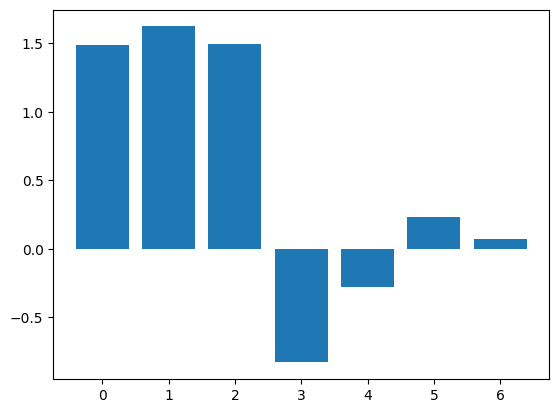

In [304]:
# linear regression feature importance

# our model will be a linear regression model 
model = LinearRegression()
# fit the model
model.fit(col_X_train, col_y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [305]:
#fitting random forest to assist with feature importance - different to the KNN model earlier 

#naming features 0 to as many exist within the model
feature_names = [f"feature {i}" for i in range(col_X_train.shape[1])]


#including random state in here so that it can be reproduced - arbitrary number is used 
random_forest_classifier = RandomForestClassifier(random_state=14)
random_forest_classifier.fit(col_X_train, col_y_train)

RandomForestClassifier(random_state=14)

In [306]:
#creating our MDI values using the random forest classifier 
feat_importances = random_forest_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_classifier.estimators_], axis=0)

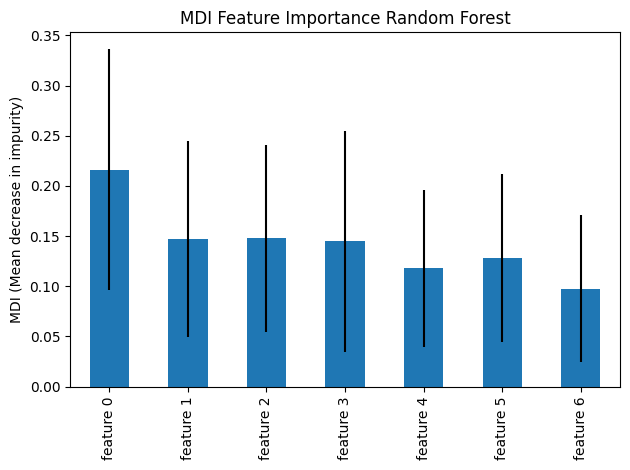

In [307]:
#plotting our MDI for features - this will make it easier to interpret 
forest_importances = pd.Series(feat_importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("MDI Feature Importance Random Forest")
ax.set_ylabel("MDI (Mean decrease in impurity)")
fig.tight_layout()

In [147]:
#correlation matrix

#corr_matrix = a.corr()
#print(corr_matrix)

In [148]:
#removing count of saccades as our weakest feature

col_X_train

array([[0.26262626, 0.6897396 , 1.        , 0.2775    , 0.14416476],
       [0.        , 0.69944486, 0.02529388, 0.005     , 0.01372998],
       [0.13131313, 0.77755827, 0.17657327, 0.06125   , 0.08924485],
       [0.        , 0.63847663, 0.01289641, 0.16625   , 0.24942792],
       [0.27272727, 0.74801125, 0.14800762, 0.08      , 0.14416476],
       [0.09090909, 0.66981477, 0.1179554 , 0.0625    , 0.10755149],
       [0.09090909, 0.76779853, 0.08135872, 0.04125   , 0.08466819],
       [0.        , 0.        , 0.03271505, 0.045     , 0.08695652],
       [1.        , 0.7731575 , 0.08265181, 0.34      , 0.47368421],
       [0.05050505, 0.66463932, 0.09918293, 0.20625   , 0.36155606],
       [0.07070707, 0.60020656, 0.04407965, 0.04      , 0.03661327],
       [0.01010101, 0.58729377, 0.02945522, 0.005     , 0.01601831],
       [0.        , 0.72117154, 0.02350202, 0.09      , 0.17162471],
       [0.        , 0.66378847, 0.06330322, 0.0525    , 0.10526316],
       [0.        , 0.70493764, 0.

In [149]:
col_X_test

array([[0.        , 0.63660116, 0.03385652, 0.00375   , 0.01144165],
       [0.        , 0.76723983, 0.03921899, 0.1525    , 0.28146453],
       [0.        , 0.71396356, 0.0840863 , 0.06125   , 0.11670481],
       [0.        , 0.98992618, 0.06617163, 0.59125   , 1.        ],
       [0.        , 0.63660116, 0.03385652, 0.1125    , 0.08695652],
       [0.07070707, 0.72042168, 0.10656553, 0.06625   , 0.11899314],
       [0.12121212, 0.77741979, 0.03478662, 0.075     , 0.13501144],
       [0.        , 0.63847663, 0.01289641, 0.0875    , 0.15789474],
       [0.01010101, 0.68916778, 0.03989757, 0.01      , 0.02059497],
       [0.09090909, 0.70355411, 0.08121351, 0.16375   , 0.27688787],
       [0.        , 0.76931579, 0.        , 0.1275    , 0.2402746 ],
       [0.06060606, 0.73864063, 0.31650883, 0.17125   , 0.33180778],
       [0.        , 0.76213252, 0.03415418, 0.1375    , 0.25171625],
       [0.        , 0.70291091, 0.05503758, 0.        , 0.        ],
       [0.16161616, 0.80252943, 0.

In [150]:
#colet

#from the authors: we define high, medium and low CW levels for workload score between 50–100, 30–49 and 0–29 respectively
#change our values to low, med, high
a = colet_final
a = a.dropna(axis=0)
a['mean_1']=a['mean_1'].astype(int)

bins = [0, 29, 49, 100]
labels = ['1', '2', '3']
a['mean_1'] = pd.cut(a['mean_1'], bins, labels=labels)
print(a)

                      file  count_blinks task mean_1  avg_diameter  \
0     Task1_Subject_1.xlsx           2.0    1      1     43.519883   
1    Task1_Subject_10.xlsx           1.0    1      1     31.667062   
2    Task1_Subject_11.xlsx          13.0    1      1     34.715345   
3    Task1_Subject_13.xlsx           2.0    1      1     28.881044   
4    Task1_Subject_14.xlsx           1.0    1      1     27.099557   
..                     ...           ...  ...    ...           ...   
137  Task1_Subject_47.xlsx          22.0    4      1     30.545127   
138   Task1_Subject_5.xlsx         100.0    4      3     34.510594   
139   Task1_Subject_7.xlsx          10.0    4      2     31.167017   
140   Task1_Subject_8.xlsx          18.0    4      2     38.898044   
141   Task1_Subject_9.xlsx          13.0    4      3     27.132073   

     avg_difference  fixation_count  saccade_count  
0          0.208102            54.0           53.0  
1          0.252434            54.0           53.0  


In [151]:
#features
#change all values to numeric for the analysis 
col_data_target= a['mean_1']



In [152]:
col_data_features = a.drop('mean_1', axis=1)

In [153]:
#removing the 'file' as this is not pertinent to our research question
col_data_features = col_data_features.drop('file', axis = 1)

In [154]:
#removing the 'task' also
col_data_features = col_data_features.drop('task', axis = 1)

In [155]:
# removing count of saccades
#removing the 'task' also
col_data_features = col_data_features.drop('saccade_count', axis = 1)

In [156]:
#scaling the feature data
scaler = MinMaxScaler()
model = scaler.fit(col_data_features)
col_data_features = model.transform(col_data_features)


In [157]:
col_data_features

array([[0.01010101, 0.96070422, 0.05502053, 0.06125   ],
       [0.        , 0.71396356, 0.0840863 , 0.06125   ],
       [0.12121212, 0.77741979, 0.03478662, 0.075     ],
       [0.01010101, 0.6559669 , 0.05241142, 0.0825    ],
       [0.        , 0.61888162, 0.04418742, 0.015     ],
       [0.29292929, 0.58231337, 0.06102269, 0.20875   ],
       [0.01010101, 0.72773342, 0.02841308, 0.02625   ],
       [0.        , 0.66378847, 0.06330322, 0.0525    ],
       [0.        , 0.69944486, 0.02529388, 0.005     ],
       [0.01010101, 0.68916778, 0.03989757, 0.01      ],
       [0.        , 0.90889139, 0.02879499, 0.025     ],
       [0.04040404, 0.92999074, 0.07104945, 0.11      ],
       [0.        , 0.        , 0.03271505, 0.045     ],
       [0.04040404, 0.72613568, 0.17149001, 0.0675    ],
       [0.05050505, 0.69407849, 0.10285516, 0.1725    ],
       [0.04040404, 0.72613568, 0.17149001, 0.0625    ],
       [0.        , 0.78280951, 0.20226188, 0.115     ],
       [0.        , 0.70291091,

In [158]:
#test-train split

col_X_train, col_X_test, col_y_train, col_y_test = train_test_split(col_data_features, col_data_target, test_size=0.3, random_state=61)

# Feature Importance second dataset 

In [159]:
#remove missing values - will not be able to convert  these for use in the modelling 

final = final.dropna()

In [160]:
ml_features = final[['CURRENT_SAC_DURATION', 'CURRENT_SAC_BLINK_END', 'RIGHT_PUPIL_SIZE_y','CURRENT_SAC_BLINK_DURATION']]

In [161]:
ml_target = final['task']

In [162]:
#scaling the feature data
scaler = MinMaxScaler()
model = scaler.fit(ml_features)
ml_features = model.transform(ml_features)


In [163]:
ml_features

array([[8.67256637e-01, 6.25000000e-01, 3.18979055e-01, 2.13571717e-18],
       [4.15929204e-01, 0.00000000e+00, 1.24372946e-01, 4.30548239e-43],
       [4.69026549e-01, 2.50000000e-01, 1.87585372e-01, 4.51300759e-35],
       [3.80530973e-01, 0.00000000e+00, 9.03513067e-01, 1.03331577e-42],
       [2.74336283e-01, 5.62500000e-01, 3.99871137e-01, 3.21648341e-23],
       [5.39823009e-01, 7.50000000e-01, 8.51515453e-02, 1.00101294e-14],
       [3.53982301e-01, 3.12500000e-01, 4.23003730e-01, 3.61980197e-31],
       [3.71681416e-01, 1.87500000e-01, 2.16902325e-01, 1.12874463e-35],
       [4.07079646e-01, 8.12500000e-01, 2.33056446e-01, 3.08317442e-11],
       [4.33628319e-01, 6.25000000e-02, 1.66444749e-01, 3.92659994e-41],
       [4.77876106e-01, 3.75000000e-01, 3.43717235e-01, 3.13239998e-31],
       [1.00000000e+00, 6.25000000e-02, 2.66497716e-01, 1.86031283e-39],
       [2.38938053e-01, 3.12500000e-01, 1.94754063e-01, 5.65629456e-29],
       [4.60176991e-01, 8.12500000e-01, 3.83592009e

In [164]:
#test-train split

ml_X_train, ml_X_test, ml_y_train, ml_y_test = train_test_split(ml_features, ml_target, test_size=0.3, random_state=61)

Feature: 0, Score: -3.48256
Feature: 1, Score: -0.63050
Feature: 2, Score: 0.02398
Feature: 3, Score: -0.66265


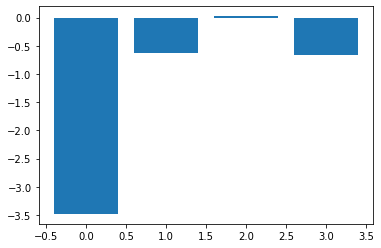

In [165]:
# linear regression feature importance

# our model will be a linear regression model 
model = LinearRegression()
# fit the model
model.fit(ml_X_train, ml_y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [166]:
#fitting random forest to assist with feature importance - different to the KNN model earlier 

#naming features 0 to as many exist within the model
feature_names = [f"feature {i}" for i in range(ml_X_train.shape[1])]


#including random state in here so that it can be reproduced - arbitrary number is used 
random_forest_classifier = RandomForestClassifier(random_state=14)
random_forest_classifier.fit(ml_X_train, ml_y_train)

RandomForestClassifier(random_state=14)

In [167]:
#creating our MDI values using the random forest classifier 
feat_importances = random_forest_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_classifier.estimators_], axis=0)

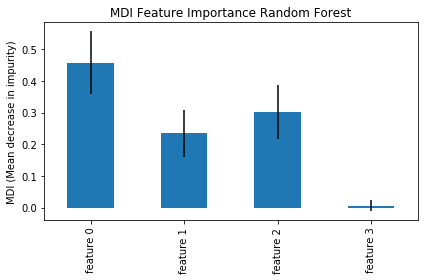

In [168]:
#plotting our MDI for features - this will make it easier to interpret 
forest_importances = pd.Series(feat_importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("MDI Feature Importance Random Forest")
ax.set_ylabel("MDI (Mean decrease in impurity)")
fig.tight_layout()

In [169]:
#correlation matrix

corr_matrix = final.corr()
print(corr_matrix)

                            RECORDING_SESSION_LABEL  CURRENT_SAC_DURATION  \
RECORDING_SESSION_LABEL                    1.000000              0.170621   
CURRENT_SAC_DURATION                       0.170621              1.000000   
CURRENT_SAC_BLINK_END                      0.308613              0.229473   
CURRENT_SAC_BLINK_DURATION                 0.133324              0.074705   
RIGHT_PUPIL_SIZE_y                        -0.113385             -0.027519   

                            CURRENT_SAC_BLINK_END  CURRENT_SAC_BLINK_DURATION  \
RECORDING_SESSION_LABEL                  0.308613                    0.133324   
CURRENT_SAC_DURATION                     0.229473                    0.074705   
CURRENT_SAC_BLINK_END                    1.000000                    0.287715   
CURRENT_SAC_BLINK_DURATION               0.287715                    1.000000   
RIGHT_PUPIL_SIZE_y                      -0.174784                    0.034864   

                            RIGHT_PUPIL_SIZE_y  
R

# Multiclass Classifiers 

# SVM model

## COLET

In [170]:
#tuning the hyperparameters through a random grid search

# parameters for the grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]} 

#verbose = 1 to limit the amount of output we see from python   
gridsearch = GridSearchCV(SVC(),  param_grid, refit = True, cv = 10, verbose = 1)
  
# fitting the gridsearch onto the model - using our training data 
gridsearch.fit(col_X_train, col_y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [171]:
# optimal hyperparameters 
print(gridsearch.best_params_)
  
# best estimators
print(gridsearch.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [172]:
#creating the SVC model

# using hyperparmaters identified earlier
support_vc=SVC(C=10, gamma=1, kernel='rbf', random_state = 52) 

# fit to training set
support_vc.fit(col_X_train,col_y_train)

# predictions on test set
y_pred=support_vc.predict(col_X_test)

#accuracy score
acc = accuracy_score(col_y_test,y_pred)

# F1 score

print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5714    0.8000    0.6667        15
           2     0.5000    0.1000    0.1667        10
           3     0.1667    0.2500    0.2000         4

    accuracy                         0.4828        29
   macro avg     0.4127    0.3833    0.3444        29
weighted avg     0.4910    0.4828    0.4299        29



In [173]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2", "3"])

array([[12,  1,  2],
       [ 6,  1,  3],
       [ 3,  0,  1]], dtype=int64)

## MLA

In [174]:
#tuning the hyperparameters through a random grid search

# parameters for the grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]} 

#verbose = 1 to limit the amount of output we see from python   
gridsearch = GridSearchCV(SVC(),  param_grid, refit = True, cv = 10, verbose = 1)
  
# fitting the gridsearch onto the model - using our training data 
gridsearch.fit(ml_X_train, ml_y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [175]:
# optimal hyperparameters 
print(gridsearch.best_params_)
  
# best estimators
print(gridsearch.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=100, gamma=1, kernel='sigmoid')


In [176]:
#creating the SVC model

# using hyperparmaters identified earlier
support_vc=SVC(C=100, gamma=1, kernel='sigmoid', random_state = 52) 

# fit to training set
support_vc.fit(ml_X_train,ml_y_train)

# predictions on test set
y_pred=support_vc.predict(ml_X_test)

#accuracy score
acc = accuracy_score(ml_y_test,y_pred)

# F1 score

print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5000    0.6667    0.5714         6
           2     0.0000    0.0000    0.0000         9
           3     0.2857    0.5000    0.3636         4
           4     0.4000    0.5000    0.4444         8

    accuracy                         0.3704        27
   macro avg     0.2964    0.4167    0.3449        27
weighted avg     0.2720    0.3704    0.3125        27



In [177]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2", "3", "4"])

array([[4, 1, 1, 0],
       [3, 0, 1, 5],
       [0, 1, 2, 1],
       [1, 0, 3, 4]], dtype=int64)

# CART

In [178]:
decist = DecisionTreeClassifier(random_state=1)
# Createing our grid of hyperparameters - these are what will be searched by the grid 
params_decist = {
'max_depth': [2, 3,4,5, 6,8,10],
'min_samples_leaf': [0.04, 0.06, 0.08, 0.10,0.2,0.4],
'max_features': [0.2, 0.4,0.6, 0.8, 0.10,0.2,0.4]
}
# doing our cross fold search through the grid, checkign by accuracy 
#making use of gridsearch to find the optimal values - note verbose = 1 to limit the amount of output we see from python  
grid_decist = GridSearchCV(estimator=decist,
param_grid=params_decist,
scoring=
'accuracy'
,
cv=10,
n_jobs=-1)




In [179]:
# Fitting the grid to our training data to then find our best hyperparameters 
grid_decist.fit(col_X_train, col_y_train)

#print best hyperparameters as found earlier - these will be used to run our model 
best_hyperparams = grid_decist.best_params_
print('Best hyerparameters for CART:', best_hyperparams)

Best hyerparameters for CART: {'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 0.08}


In [180]:
#create teh final model with our best hyperparameters 

final_model = DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.08, random_state = 50)
final_model.fit(col_X_train, col_y_train)

print(final_model)

#test them 
expected_y  = col_y_test
predicted_y = final_model.predict(col_X_test)
#predicting values from logistic regression and viewing our test score
y_pred = final_model.predict(col_X_test)
print('Accuracy of CART classifier on test set: {:.4f}'.format(final_model.score(col_X_test, col_y_test)))

# F1 score
print(classification_report(col_y_test, y_pred, digits=4))

DecisionTreeClassifier(max_depth=2, max_features=0.6, min_samples_leaf=0.08,
                       random_state=50)
Accuracy of CART classifier on test set: 0.4828
              precision    recall  f1-score   support

           1     0.8750    0.4667    0.6087        15
           2     0.4545    0.5000    0.4762        10
           3     0.2000    0.5000    0.2857         4

    accuracy                         0.4828        29
   macro avg     0.5098    0.4889    0.4569        29
weighted avg     0.6369    0.4828    0.5185        29



In [181]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2", "3"])

array([[7, 4, 4],
       [1, 5, 4],
       [0, 2, 2]], dtype=int64)

# MLA

In [182]:
decist = DecisionTreeClassifier(random_state=1)
# Createing our grid of hyperparameters - these are what will be searched by the grid 
params_decist = {
'max_depth': [2, 3,4,5, 6],
'min_samples_leaf': [0.04, 0.06, 0.08, 0.10],
'max_features': [0.2, 0.4,0.6, 0.8, 0.10]
}
# doing our cross fold search through the grid, checkign by accuracy 
#making use of gridsearch to find the optimal values - note verbose = 1 to limit the amount of output we see from python  
grid_decist = GridSearchCV(estimator=decist,
param_grid=params_decist,
scoring=
'accuracy'
,
cv=10,
n_jobs=-1)




In [183]:
# Fitting the grid to our training data to then find our best hyperparameters 
grid_decist.fit(ml_X_train, ml_y_train)

#print best hyperparameters as found earlier - these will be used to run our model 
best_hyperparams = grid_decist.best_params_
print('Best hyerparameters for CART:', best_hyperparams)

Best hyerparameters for CART: {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.04}


In [184]:
#create teh final model with our best hyperparameters 

final_model = DecisionTreeClassifier(max_depth = 3, max_features = 0.2, min_samples_leaf = 0.04, random_state = 52)
final_model.fit(ml_X_train, ml_y_train)

print(final_model)
#test them 
#expected_y  = ml_y_test
#predicted_y = final_model.predict(ml_X_test)
#predicting values from logistic regression and viewing our test score
y_pred = final_model.predict(ml_X_test)
print('Accuracy of CART classifier on test set: {:.4f}'.format(final_model.score(ml_X_test, ml_y_test)))

print(classification_report(ml_y_test, y_pred, digits=4))

DecisionTreeClassifier(max_depth=3, max_features=0.2, min_samples_leaf=0.04,
                       random_state=52)
Accuracy of CART classifier on test set: 0.4074
              precision    recall  f1-score   support

           1     0.5000    0.6667    0.5714         6
           2     0.3333    0.2222    0.2667         9
           3     0.0000    0.0000    0.0000         4
           4     0.3846    0.6250    0.4762         8

    accuracy                         0.4074        27
   macro avg     0.3045    0.3785    0.3286        27
weighted avg     0.3362    0.4074    0.3570        27



In [185]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2", "3", "4"])

array([[4, 2, 0, 0],
       [2, 2, 0, 5],
       [0, 1, 0, 3],
       [2, 1, 0, 5]], dtype=int64)

# GNB

# Colet

In [186]:


cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=10, 
                                    random_state=999)


In [187]:
model = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(col_X_test)

gs_NB.fit(Data_transformed, col_y_test);

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


In [188]:
gs_NB.best_params_

{'var_smoothing': 0.533669923120631}

In [189]:
nb = GaussianNB(var_smoothing = 0.533669923120631)
nb.fit(col_X_train, col_y_train)
# make predictions on test set
y_pred=nb.predict(col_X_test)

#confm = confusion_matrix(col_y_test, y_pred)
acc = accuracy_score(col_y_test,y_pred)

print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5185    0.9333    0.6667        15
           2     0.0000    0.0000    0.0000        10
           3     0.0000    0.0000    0.0000         4

    accuracy                         0.4828        29
   macro avg     0.1728    0.3111    0.2222        29
weighted avg     0.2682    0.4828    0.3448        29



In [190]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2", "3"])

array([[14,  1,  0],
       [ 9,  0,  1],
       [ 4,  0,  0]], dtype=int64)

# MLA

In [191]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(ml_X_test)

gs_NB.fit(Data_transformed, ml_y_test);

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


In [192]:
gs_NB.best_params_

{'var_smoothing': 2.848035868435805e-09}

In [193]:
nb = GaussianNB(var_smoothing = 2.848035868435805e-09)
nb.fit(ml_X_train, ml_y_train)
# make predictions on test set
y_pred=nb.predict(ml_X_test)

#confm = confusion_matrix(col_y_test, y_pred)
acc = accuracy_score(ml_y_test,y_pred)

print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000         6
           2     0.2000    0.1111    0.1429         9
           3     0.0000    0.0000    0.0000         4
           4     0.3846    0.6250    0.4762         8

    accuracy                         0.2222        27
   macro avg     0.1462    0.1840    0.1548        27
weighted avg     0.1806    0.2222    0.1887        27



In [194]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2", "3", "4"])

array([[0, 4, 2, 0],
       [0, 1, 4, 4],
       [0, 0, 0, 4],
       [0, 0, 3, 5]], dtype=int64)

# KNN

## Colet

In [ ]:
#code here 

## MLA

In [ ]:
#code here

# Logistic Regression

## COLET

In [ ]:
#code here 

## MLA

In [ ]:
#code here

# Random Forest

## COLET

In [ ]:
#code here

## MLA

# Gradient Boosted Regression Tree

## COLET

In [ ]:
# code here

## MLA

In [ ]:
# code here 

# TabNet

## COLET

In [8]:
#SGD classifier as we don't have a large dataset, ADAM if we had a larger one 

#example of this being used below 
#https://www.kaggle.com/code/enigmak/tabnet-deep-neural-network-for-tabular-data#Tabnet 
tnet_classifier = TabNetClassifier(optimizer_fn=torch.optim.SGD,
                                   scheduler_params={"step_size":10,
                                                    "gamma":0.9},
                                   scheduler_fn=torch.optim.lr_scheduler.StepLR,
                                  )

#fitting the model
tnet_classifier.fit(
    col_X_train, col_y_train,
    eval_set=[(col_X_train, col_y_train),(col_X_test, col_y_test)],
    eval_name=['train','test'],
    eval_metric=['accuracy', 'f1', 'precision', 'recall'],
    max_epochs=50, 
    patience=10,
    batch_size=10,
    virtual_batch_size=10,
    num_workers=0,
    weights=1,
    drop_last=False
)

NameError: name 'col_X_train' is not defined

In [ ]:
predictions=tnet_classifier.predict(col_X_test)
print(classification_report(col_y_test, col_y_pred))

## MLA

In [ ]:
# CODE HERE 

# Stacked Model

## Colet 

In [195]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.08, random_state = 50)),
 ('gnb',GaussianNB(var_smoothing = 0.533669923120631))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='rbf', random_state = 52))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5789    0.7333    0.6471        15
           2     0.0000    0.0000    0.0000        10
           3     0.2000    0.5000    0.2857         4

    accuracy                         0.4483        29
   macro avg     0.2596    0.4111    0.3109        29
weighted avg     0.3270    0.4483    0.3741        29



In [196]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2", "3"])

array([[11,  0,  4],
       [ 6,  0,  4],
       [ 2,  0,  2]], dtype=int64)

# Removing GNB

In [197]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.08, random_state = 50))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='rbf', random_state = 52))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5789    0.7333    0.6471        15
           2     0.0000    0.0000    0.0000        10
           3     0.2000    0.5000    0.2857         4

    accuracy                         0.4483        29
   macro avg     0.2596    0.4111    0.3109        29
weighted avg     0.3270    0.4483    0.3741        29



In [198]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2", "3"])

array([[11,  0,  4],
       [ 6,  0,  4],
       [ 2,  0,  2]], dtype=int64)

# Removing CART

In [199]:
estimators = [
 ('gnb',GaussianNB(var_smoothing = 0.533669923120631))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='rbf', random_state = 52))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5385    0.9333    0.6829        15
           2     0.0000    0.0000    0.0000        10
           3     0.0000    0.0000    0.0000         4

    accuracy                         0.4828        29
   macro avg     0.1795    0.3111    0.2276        29
weighted avg     0.2785    0.4828    0.3532        29



In [200]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2", "3"])

array([[14,  0,  1],
       [ 8,  0,  2],
       [ 4,  0,  0]], dtype=int64)

# MLA

In [201]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 3, max_features = 0.2, min_samples_leaf = 0.04, random_state = 52)),
 ('gnb',GaussianNB(var_smoothing = 2.848035868435805e-09))]
clf = StackingClassifier(
estimators=estimators, final_estimator=SVC(C=100, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5000    0.6667    0.5714         6
           2     0.2500    0.1111    0.1538         9
           3     0.1000    0.2500    0.1429         4
           4     0.0000    0.0000    0.0000         8

    accuracy                         0.2222        27
   macro avg     0.2125    0.2569    0.2170        27
weighted avg     0.2093    0.2222    0.1994        27



In [202]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2", "3", "4"])

array([[4, 0, 2, 0],
       [2, 1, 3, 3],
       [0, 1, 1, 2],
       [2, 2, 4, 0]], dtype=int64)

# Removing GNB

In [203]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 3, max_features = 0.2, min_samples_leaf = 0.04, random_state = 52))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=100, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.4000    0.3333    0.3636         6
           2     0.3333    0.1111    0.1667         9
           3     0.2143    0.7500    0.3333         4
           4     0.2000    0.1250    0.1538         8

    accuracy                         0.2593        27
   macro avg     0.2869    0.3299    0.2544        27
weighted avg     0.2910    0.2593    0.2313        27



In [204]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2", "3", "4"])

array([[2, 2, 1, 1],
       [1, 1, 5, 2],
       [0, 0, 3, 1],
       [2, 0, 5, 1]], dtype=int64)

# Removing CART

In [205]:
estimators = [
 ('gnb',GaussianNB(var_smoothing = 2.848035868435805e-09))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=100, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.3636    0.6667    0.4706         6
           2     0.0000    0.0000    0.0000         9
           3     0.1429    0.2500    0.1818         4
           4     0.1667    0.1250    0.1429         8

    accuracy                         0.2222        27
   macro avg     0.1683    0.2604    0.1988        27
weighted avg     0.1514    0.2222    0.1738        27



In [206]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2", "3", "4"])

array([[4, 2, 0, 0],
       [4, 0, 2, 3],
       [0, 1, 1, 2],
       [3, 0, 4, 1]], dtype=int64)

# Changing the final classifier

# Colet

# GNB final

In [207]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.08, random_state = 50)),
 ('svc', SVC(C=10, gamma=1, kernel='rbf', random_state = 52))]
clf = StackingClassifier(
estimators=estimators, final_estimator = GaussianNB(var_smoothing = 0.533669923120631))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6000    0.8000    0.6857        15
           2     0.5000    0.1000    0.1667        10
           3     0.1429    0.2500    0.1818         4

    accuracy                         0.4828        29
   macro avg     0.4143    0.3833    0.3447        29
weighted avg     0.5025    0.4828    0.4372        29



In [208]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2", "3"])

array([[12,  1,  2],
       [ 5,  1,  4],
       [ 3,  0,  1]], dtype=int64)

# CART final

In [209]:
estimators = [
 ('svc', SVC(C=10, gamma=1, kernel='rbf', random_state = 52)),
 ('gnb',GaussianNB(var_smoothing = 0.533669923120631))]
clf = StackingClassifier(
estimators=estimators, final_estimator = DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.08, random_state = 50))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6316    0.8000    0.7059        15
           2     0.0000    0.0000    0.0000        10
           3     0.2000    0.5000    0.2857         4

    accuracy                         0.4828        29
   macro avg     0.2772    0.4333    0.3305        29
weighted avg     0.3543    0.4828    0.4045        29



In [210]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2", "3"])

array([[12,  0,  3],
       [ 5,  0,  5],
       [ 2,  0,  2]], dtype=int64)

# MLA

# GNB final

In [211]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 3, max_features = 0.2, min_samples_leaf = 0.04, random_state = 52)),
 ('svc', SVC(C=100, gamma=1, kernel='sigmoid', random_state = 52))]
clf = StackingClassifier(
estimators=estimators, final_estimator = GaussianNB(var_smoothing = 2.848035868435805e-09))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5000    0.6667    0.5714         6
           2     0.0000    0.0000    0.0000         9
           3     0.0000    0.0000    0.0000         4
           4     0.3571    0.6250    0.4545         8

    accuracy                         0.3333        27
   macro avg     0.2143    0.3229    0.2565        27
weighted avg     0.2169    0.3333    0.2617        27



In [212]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2", "3", "4"])

array([[4, 0, 2, 0],
       [2, 0, 2, 5],
       [0, 0, 0, 4],
       [2, 0, 1, 5]], dtype=int64)

# CART final

In [213]:
estimators = [
 ('svc', SVC(C=100, gamma=1, kernel='sigmoid', random_state = 52)),
 ('gnb',GaussianNB(var_smoothing = 2.848035868435805e-09))]
clf = StackingClassifier(
estimators=estimators, final_estimator = DecisionTreeClassifier(max_depth = 3, max_features = 0.2, min_samples_leaf = 0.04, random_state = 52))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.8000    0.6667    0.7273         6
           2     0.0000    0.0000    0.0000         9
           3     0.1818    1.0000    0.3077         4
           4     0.0000    0.0000    0.0000         8

    accuracy                         0.2963        27
   macro avg     0.2455    0.4167    0.2587        27
weighted avg     0.2047    0.2963    0.2072        27



In [214]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2", "3", "4"])

array([[4, 0, 2, 0],
       [1, 0, 8, 0],
       [0, 0, 4, 0],
       [0, 0, 8, 0]], dtype=int64)

# Binary classifiers

## Colet

In [215]:
#colet

#from the authors: we define high, medium and low CW levels for workload score between 50–100, 30–49 and 0–29 respectively
#change our values to low, med, high
a = colet_final
a = a.dropna(axis=0)
a['mean_1']=a['mean_1'].astype(int)

bins = [0, 29, 49, 100]
labels = ['1', '2', '3']
a['mean_1'] = pd.cut(a['mean_1'], bins, labels=labels)
print(a)

                      file  count_blinks task mean_1  avg_diameter  \
0     Task1_Subject_1.xlsx           2.0    1      1     43.519883   
1    Task1_Subject_10.xlsx           1.0    1      1     31.667062   
2    Task1_Subject_11.xlsx          13.0    1      1     34.715345   
3    Task1_Subject_13.xlsx           2.0    1      1     28.881044   
4    Task1_Subject_14.xlsx           1.0    1      1     27.099557   
..                     ...           ...  ...    ...           ...   
137  Task1_Subject_47.xlsx          22.0    4      1     30.545127   
138   Task1_Subject_5.xlsx         100.0    4      3     34.510594   
139   Task1_Subject_7.xlsx          10.0    4      2     31.167017   
140   Task1_Subject_8.xlsx          18.0    4      2     38.898044   
141   Task1_Subject_9.xlsx          13.0    4      3     27.132073   

     avg_difference  fixation_count  saccade_count  
0          0.208102            54.0           53.0  
1          0.252434            54.0           53.0  


In [216]:
# change the 3 classes into 2 - replacing our high with the 'low' value - combining low and high to consider this our 'abnormal' and 2 will remain our 'normal'

a['mean_1'] = a['mean_1'].replace('3', '1')

In [217]:
a

,file,count_blinks,task,mean_1,avg_diameter,avg_difference,fixation_count,saccade_count
0,Task1_Subject_1.xlsx,2.0,1,1,43.519883,0.208102,54.0,53.0
1,Task1_Subject_10.xlsx,1.0,1,1,31.667062,0.252434,54.0,53.0
2,Task1_Subject_11.xlsx,13.0,1,1,34.715345,0.177241,65.0,61.0
3,Task1_Subject_13.xlsx,2.0,1,1,28.881044,0.204122,71.0,71.0
4,Task1_Subject_14.xlsx,1.0,1,1,27.099557,0.191579,17.0,13.0
...,...,...,...,...,...,...,...,...
137,Task1_Subject_47.xlsx,22.0,4,1,30.545127,0.447389,78.0,12.0
138,Task1_Subject_5.xlsx,100.0,4,1,34.510594,0.250246,277.0,209.0
139,Task1_Subject_7.xlsx,10.0,4,2,31.167017,0.248052,136.0,123.0
140,Task1_Subject_8.xlsx,18.0,4,2,38.898044,0.205878,101.0,98.0


In [218]:
#target
col_bin_data_target= a['mean_1']



In [219]:
col_bin_data_features = a.drop('mean_1', axis=1)

In [220]:
#removing the 'file' as this is not pertinent to our research question
col_bin_data_features = col_bin_data_features.drop('file', axis = 1)

In [221]:
#removing the 'task' also
col_bin_data_features = col_bin_data_features.drop('task', axis = 1)

In [222]:
#removing the 'saccade' also
col_bin_data_features = col_bin_data_features.drop('saccade_count', axis = 1)

In [223]:
col_bin_data_features

,count_blinks,avg_diameter,avg_difference,fixation_count
0,2.0,43.519883,0.208102,54.0
1,1.0,31.667062,0.252434,54.0
2,13.0,34.715345,0.177241,65.0
3,2.0,28.881044,0.204122,71.0
4,1.0,27.099557,0.191579,17.0
...,...,...,...,...
137,22.0,30.545127,0.447389,78.0
138,100.0,34.510594,0.250246,277.0
139,10.0,31.167017,0.248052,136.0
140,18.0,38.898044,0.205878,101.0


In [224]:
#scaling the feature data
scaler = MinMaxScaler()
model = scaler.fit(col_bin_data_features)
col_bin_data_features = model.transform(col_bin_data_features)


In [225]:
col_bin_data_features

array([[0.01010101, 0.96070422, 0.05502053, 0.06125   ],
       [0.        , 0.71396356, 0.0840863 , 0.06125   ],
       [0.12121212, 0.77741979, 0.03478662, 0.075     ],
       [0.01010101, 0.6559669 , 0.05241142, 0.0825    ],
       [0.        , 0.61888162, 0.04418742, 0.015     ],
       [0.29292929, 0.58231337, 0.06102269, 0.20875   ],
       [0.01010101, 0.72773342, 0.02841308, 0.02625   ],
       [0.        , 0.66378847, 0.06330322, 0.0525    ],
       [0.        , 0.69944486, 0.02529388, 0.005     ],
       [0.01010101, 0.68916778, 0.03989757, 0.01      ],
       [0.        , 0.90889139, 0.02879499, 0.025     ],
       [0.04040404, 0.92999074, 0.07104945, 0.11      ],
       [0.        , 0.        , 0.03271505, 0.045     ],
       [0.04040404, 0.72613568, 0.17149001, 0.0675    ],
       [0.05050505, 0.69407849, 0.10285516, 0.1725    ],
       [0.04040404, 0.72613568, 0.17149001, 0.0625    ],
       [0.        , 0.78280951, 0.20226188, 0.115     ],
       [0.        , 0.70291091,

In [226]:
#test-train split

col_X_train, col_X_test, col_y_train, col_y_test = train_test_split(col_bin_data_features, col_bin_data_target, test_size=0.3, random_state=61)

## MLA

In [227]:
final = pd.merge(mla_final_test, test, left_index=True, right_index=True)

In [228]:
#drop additional columns

final.drop(['RIGHT_PUPIL_SIZE_x', 'LEFT_PUPIL_SIZE'], axis =1, inplace = True)

In [229]:
#remove missing values - will not be able to convert  these for use in the modelling 

final = final.dropna()

In [230]:
#combining task 1 and 3 (both interference tasks) and 2 and 4 (both non-interference tasks)

final['task']= final['task'].replace ('3','1')

In [231]:
final['task']= final['task'].replace ('4','2')

In [232]:
final

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task,CURRENT_SAC_BLINK_END,CURRENT_SAC_BLINK_DURATION,RIGHT_PUPIL_SIZE_y
0,10,128,1,11.0,4.960460e+25,510.992782
1,11,77,1,1.0,3.600000e+01,316.081529
2,12,83,1,5.0,1.048200e+09,379.393072
3,13,73,1,1.0,5.000000e+01,1096.443349
4,14,61,1,10.0,7.470669e+20,592.011703
...,...,...,...,...,...,...
213,29,59,2,5.0,1.447757e+10,295.598046
214,3,50,2,2.0,2.130000e+03,266.598510
215,30,70,2,10.0,8.482708e+20,357.203114
216,31,48,2,8.0,3.352661e+14,475.595538


In [233]:
ml_features = final[['CURRENT_SAC_DURATION', 'CURRENT_SAC_BLINK_END', 'RIGHT_PUPIL_SIZE_y']]

In [234]:
ml_target = final['task']

In [235]:
#scaling the feature data
scaler = MinMaxScaler()
model = scaler.fit(ml_features)
ml_features = model.transform(ml_features)

In [236]:
#test-train split

ml_X_train, ml_X_test, ml_y_train, ml_y_test = train_test_split(ml_features, ml_target, test_size=0.3, random_state=61)

# SVM model Binary

## COLET

In [237]:
#tuning the hyperparameters through a random grid search

# parameters for the grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]} 

#verbose = 1 to limit the amount of output we see from python   
gridsearch = GridSearchCV(SVC(),  param_grid, refit = True, cv = 10, verbose = 1)
  
# fitting the gridsearch onto the model - using our training data 
gridsearch.fit(col_X_train, col_y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [238]:
# optimal hyperparameters 
print(gridsearch.best_params_)
  
# best estimators
print(gridsearch.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=10, gamma=1, kernel='sigmoid')


In [239]:
#creating the SVC model

# using hyperparmaters identified earlier
support_vc=SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52) 

# fit to training set
support_vc.fit(col_X_train,col_y_train)

# predictions on test set
y_pred=support_vc.predict(col_X_test)

#accuracy score
acc = accuracy_score(col_y_test,y_pred)

# F1 score

print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.7037    1.0000    0.8261        19
           2     1.0000    0.2000    0.3333        10

    accuracy                         0.7241        29
   macro avg     0.8519    0.6000    0.5797        29
weighted avg     0.8059    0.7241    0.6562        29



In [240]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2"])

array([[19,  0],
       [ 8,  2]], dtype=int64)

## MLA

In [241]:
#tuning the hyperparameters through a random grid search

# parameters for the grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]} 

#verbose = 1 to limit the amount of output we see from python   
gridsearch = GridSearchCV(SVC(),  param_grid, refit = True, cv = 10, verbose = 1)
  
# fitting the gridsearch onto the model - using our training data 
gridsearch.fit(ml_X_train, ml_y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [242]:
# optimal hyperparameters 
print(gridsearch.best_params_)
  
# best estimators
print(gridsearch.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=10, gamma=1, kernel='sigmoid')


In [243]:
#creating the SVC model

# using hyperparmaters identified earlier
support_vc=SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52) 

# fit to training set
support_vc.fit(ml_X_train,ml_y_train)

# predictions on test set
y_pred=support_vc.predict(ml_X_test)

#accuracy score
acc = accuracy_score(ml_y_test,y_pred)

# F1 score

print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5000    0.6000    0.5455        10
           2     0.7333    0.6471    0.6875        17

    accuracy                         0.6296        27
   macro avg     0.6167    0.6235    0.6165        27
weighted avg     0.6469    0.6296    0.6349        27



In [244]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2"])

array([[ 6,  4],
       [ 6, 11]], dtype=int64)

# CART

In [245]:
decist = DecisionTreeClassifier(random_state=1)
# Createing our grid of hyperparameters - these are what will be searched by the grid 
params_decist = {
'max_depth': [2, 3,4,5, 6,8,10],
'min_samples_leaf': [0.04, 0.06, 0.08, 0.10,0.2,0.4],
'max_features': [0.2, 0.4,0.6, 0.8, 0.10,0.2,0.4]
}
# doing our cross fold search through the grid, checkign by accuracy 
#making use of gridsearch to find the optimal values - note verbose = 1 to limit the amount of output we see from python  
grid_decist = GridSearchCV(estimator=decist,
param_grid=params_decist,
scoring=
'accuracy'
,
cv=10,
n_jobs=-1)




In [246]:
# Fitting the grid to our training data to then find our best hyperparameters 
grid_decist.fit(col_X_train, col_y_train)

#print best hyperparameters as found earlier - these will be used to run our model 
best_hyperparams = grid_decist.best_params_
print('Best hyerparameters for CART:', best_hyperparams)

Best hyerparameters for CART: {'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 0.2}


In [247]:
#create teh final model with our best hyperparameters 

final_model = DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.2, random_state = 50)
final_model.fit(col_X_train, col_y_train)
end = time.time()
print(final_model)
#pringint the total time taken - gives us an idea of computational complexity
#test them 
expected_y  = col_y_test
predicted_y = final_model.predict(col_X_test)
#predicting values from logistic regression and viewing our test score
y_pred = final_model.predict(col_X_test)
print('Accuracy of CART classifier on test set: {:.4f}'.format(final_model.score(col_X_test, col_y_test)))

print(classification_report(col_y_test, predicted_y, digits=4))

DecisionTreeClassifier(max_depth=2, max_features=0.6, min_samples_leaf=0.2,
                       random_state=50)
Accuracy of CART classifier on test set: 0.6207
              precision    recall  f1-score   support

           1     0.6667    0.8421    0.7442        19
           2     0.4000    0.2000    0.2667        10

    accuracy                         0.6207        29
   macro avg     0.5333    0.5211    0.5054        29
weighted avg     0.5747    0.6207    0.5795        29



In [248]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2"])

array([[16,  3],
       [ 8,  2]], dtype=int64)

# MLA

In [249]:
decist = DecisionTreeClassifier(random_state=1)
# Createing our grid of hyperparameters - these are what will be searched by the grid 
params_decist = {
'max_depth': [2, 3,4,5, 6],
'min_samples_leaf': [0.04, 0.06, 0.08, 0.10],
'max_features': [0.2, 0.4,0.6, 0.8, 0.10]
}
# doing our cross fold search through the grid, checkign by accuracy 
#making use of gridsearch to find the optimal values - note verbose = 1 to limit the amount of output we see from python  
grid_decist = GridSearchCV(estimator=decist,
param_grid=params_decist,
scoring=
'accuracy'
,
cv=10,
n_jobs=-1)




In [250]:
# Fitting the grid to our training data to then find our best hyperparameters 
grid_decist.fit(ml_X_train, ml_y_train)

#print best hyperparameters as found earlier - these will be used to run our model 
best_hyperparams = grid_decist.best_params_
print('Best hyerparameters for CART:', best_hyperparams)

Best hyerparameters for CART: {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.04}


In [251]:
#final model with hyperparameters found above 

final_model = DecisionTreeClassifier(max_depth = 3, max_features = 0.2, min_samples_leaf = 0.04, random_state = 52)
final_model.fit(ml_X_train, ml_y_train)

print(final_model)

#test them 
expected_y  = ml_y_test
predicted_y = final_model.predict(ml_X_test)


y_pred = final_model.predict(ml_X_test)
print('Accuracy of CART classifier on test set: {:.4f}'.format(final_model.score(ml_X_test, ml_y_test)))

print(classification_report(ml_y_test, y_pred, digits=4))

DecisionTreeClassifier(max_depth=3, max_features=0.2, min_samples_leaf=0.04,
                       random_state=52)
Accuracy of CART classifier on test set: 0.4444
              precision    recall  f1-score   support

           1     0.3529    0.6000    0.4444        10
           2     0.6000    0.3529    0.4444        17

    accuracy                         0.4444        27
   macro avg     0.4765    0.4765    0.4444        27
weighted avg     0.5085    0.4444    0.4444        27



In [252]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2"])

array([[ 6,  4],
       [11,  6]], dtype=int64)

# GNB

# Colet

In [253]:


cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=10, 
                                    random_state=999)


In [254]:
model = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(col_X_test)

gs_NB.fit(Data_transformed, col_y_test);

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


In [255]:
gs_NB.best_params_

{'var_smoothing': 1.0}

In [256]:
nb = GaussianNB(var_smoothing = 1.0)
nb.fit(col_X_train, col_y_train)
# make predictions on test set
y_pred=nb.predict(col_X_test)

#confm = confusion_matrix(col_y_test, y_pred)
acc = accuracy_score(col_y_test,y_pred)

print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6552    1.0000    0.7917        19
           2     0.0000    0.0000    0.0000        10

    accuracy                         0.6552        29
   macro avg     0.3276    0.5000    0.3958        29
weighted avg     0.4293    0.6552    0.5187        29



In [257]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2"])

array([[19,  0],
       [10,  0]], dtype=int64)

# MLA

In [258]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(ml_X_test)

gs_NB.fit(Data_transformed, ml_y_test);

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


In [259]:
gs_NB.best_params_

{'var_smoothing': 0.15199110829529336}

In [260]:
nb = GaussianNB(var_smoothing = 0.15199110829529336)
nb.fit(ml_X_train, ml_y_train)
# make predictions on test set
y_pred=nb.predict(ml_X_test)

#confm = confusion_matrix(col_y_test, y_pred)
acc = accuracy_score(ml_y_test,y_pred)

print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.3636    0.4000    0.3810        10
           2     0.6250    0.5882    0.6061        17

    accuracy                         0.5185        27
   macro avg     0.4943    0.4941    0.4935        27
weighted avg     0.5282    0.5185    0.5227        27



In [261]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2"])

array([[ 4,  6],
       [ 7, 10]], dtype=int64)

# Stacked Model

## Colet 

In [262]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.2, random_state = 50)),
 ('gnb',GaussianNB(var_smoothing = 1.0))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6552    1.0000    0.7917        19
           2     0.0000    0.0000    0.0000        10

    accuracy                         0.6552        29
   macro avg     0.3276    0.5000    0.3958        29
weighted avg     0.4293    0.6552    0.5187        29



In [263]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2"])

array([[19,  0],
       [10,  0]], dtype=int64)

# Removing GNB

In [264]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.2, random_state = 50))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6552    1.0000    0.7917        19
           2     0.0000    0.0000    0.0000        10

    accuracy                         0.6552        29
   macro avg     0.3276    0.5000    0.3958        29
weighted avg     0.4293    0.6552    0.5187        29



In [265]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2"])

array([[19,  0],
       [10,  0]], dtype=int64)

# Removing CART

In [266]:
estimators = [
 ('gnb',GaussianNB(var_smoothing = 1.0))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6552    1.0000    0.7917        19
           2     0.0000    0.0000    0.0000        10

    accuracy                         0.6552        29
   macro avg     0.3276    0.5000    0.3958        29
weighted avg     0.4293    0.6552    0.5187        29



In [267]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2"])

array([[19,  0],
       [10,  0]], dtype=int64)

## MLA

# MLA

In [268]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 3, max_features = 0.2, min_samples_leaf = 0.04, random_state = 52)),
 ('gnb',GaussianNB(var_smoothing = 0.15199110829529336))]
clf = StackingClassifier(
estimators=estimators, final_estimator=SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred=clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.4000    0.8000    0.5333        10
           2     0.7143    0.2941    0.4167        17

    accuracy                         0.4815        27
   macro avg     0.5571    0.5471    0.4750        27
weighted avg     0.5979    0.4815    0.4599        27



In [269]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2"])

array([[ 8,  2],
       [12,  5]], dtype=int64)

# Removing GNB

In [270]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.2, random_state = 50))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.3704    1.0000    0.5405        10
           2     0.0000    0.0000    0.0000        17

    accuracy                         0.3704        27
   macro avg     0.1852    0.5000    0.2703        27
weighted avg     0.1372    0.3704    0.2002        27



In [271]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2"])

array([[10,  0],
       [17,  0]], dtype=int64)

# Removing CART

In [272]:
estimators = [
 ('gnb',GaussianNB(var_smoothing = 1.0))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.3636    0.4000    0.3810        10
           2     0.6250    0.5882    0.6061        17

    accuracy                         0.5185        27
   macro avg     0.4943    0.4941    0.4935        27
weighted avg     0.5282    0.5185    0.5227        27



In [273]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2"])

array([[ 4,  6],
       [ 7, 10]], dtype=int64)

# Changing the final classifier

In [274]:
# Colet

In [275]:
# GNB final

In [276]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.2, random_state = 50)),
 ('svc', SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))]
clf = StackingClassifier(
estimators=estimators, final_estimator = GaussianNB(var_smoothing = 1.0))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6552    1.0000    0.7917        19
           2     0.0000    0.0000    0.0000        10

    accuracy                         0.6552        29
   macro avg     0.3276    0.5000    0.3958        29
weighted avg     0.4293    0.6552    0.5187        29



In [277]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2"])

array([[19,  0],
       [10,  0]], dtype=int64)

In [278]:
# CART final

In [279]:
estimators = [
 ('svc', SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52)),
 ('gnb',GaussianNB(var_smoothing = 1.0))]
clf = StackingClassifier(
estimators=estimators, final_estimator = DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.2, random_state = 50))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6667    0.9474    0.7826        19
           2     0.5000    0.1000    0.1667        10

    accuracy                         0.6552        29
   macro avg     0.5833    0.5237    0.4746        29
weighted avg     0.6092    0.6552    0.5702        29



In [280]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2"])

array([[18,  1],
       [ 9,  1]], dtype=int64)

In [281]:
# MLA

In [282]:
# Colet

In [283]:
# GNB final

In [284]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.2, random_state = 50)),
 ('svc', SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))]
clf = StackingClassifier(
estimators=estimators, final_estimator = GaussianNB(var_smoothing = 1.0))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.4615    0.6000    0.5217        10
           2     0.7143    0.5882    0.6452        17

    accuracy                         0.5926        27
   macro avg     0.5879    0.5941    0.5835        27
weighted avg     0.6207    0.5926    0.5994        27



In [285]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2"])

array([[ 6,  4],
       [ 7, 10]], dtype=int64)

In [286]:
# CART final

In [287]:
estimators = [
 ('svc', SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52)),
 ('gnb',GaussianNB(var_smoothing = 1.0))]
clf = StackingClassifier(
estimators=estimators, final_estimator = DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.2, random_state = 50))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5000    0.6000    0.5455        10
           2     0.7333    0.6471    0.6875        17

    accuracy                         0.6296        27
   macro avg     0.6167    0.6235    0.6165        27
weighted avg     0.6469    0.6296    0.6349        27



In [288]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2"])

array([[ 6,  4],
       [ 6, 11]], dtype=int64)